In [462]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import cvxopt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
#import statsmodels.api as sm
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

from scipy import stats
import scipy as sc

from sklearn.linear_model import Lasso, LassoCV, LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from math import log2
from os import listdir
from functools import reduce
from collections import Counter, defaultdict
from random import choice, shuffle
from nltk.tokenize import regexp_tokenize

from sklearn import datasets
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, classification_report, f1_score
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
from numpy import loadtxt
from xgboost import XGBClassifier#maybe comment
from xgboost import XGBRegressor #maybe comment
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC

import sys
import re
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import seaborn
from sklearn.naive_bayes import MultinomialNB
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.probability import FreqDist
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.preprocessing import MultiLabelBinarizer
porter = PorterStemmer()
lancaster=LancasterStemmer()
seaborn.set()
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import f1_score


%matplotlib inline
import seaborn as sns
sns.set(font_scale = 1.5)
from sklearn import svm, datasets


In [394]:
df_tomato = pd.read_csv("rotten_tomatoes_movies.csv", index_col=0)
df_tomato.head()

,movie_title,movie_info,critics_consensus,poster_image_url,rating,genre,directors,writers,cast,in_theaters_date,...,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,audience_top_critics_count,audience_fresh_critics_count,audience_rotten_critics_count
rotten_tomatoes_link,,,,,,,,,,,,,,,,,,,,,
/m/0814255,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,https://resizing.flixster.com/p1veUpQ4ktsSHtRu...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49,144,Spilled,53.0,254287.0,38,71,73
/m/0878835,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,https://resizing.flixster.com/0AbudQ4KsB4BeXSB...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified Fresh,86,140,Upright,64.0,11567.0,43,121,19
/m/10,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,https://resizing.flixster.com/mF0dxH6UTa0FdkMs...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,68,22,Spilled,53.0,14670.0,2,15,7
/m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,https://resizing.flixster.com/u-8xAyGaDVvROLiR...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified Fresh,100,51,Upright,97.0,105000.0,6,51,0
/m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",https://resizing.flixster.com/FKExgYBHu07XLoil...,G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89,27,Upright,74.0,68860.0,5,24,3


In [395]:
df_x = pd.read_csv("inputInfo_X2.csv")#change this
df_y = pd.read_csv("inputInfo_Y2.csv")

In [396]:
df_y.columns

Index(['avg_vote', 'metascore', 'reviews_from_users', 'reviews_from_critics',
       'tomatometer_rating', 'audience_rating', 'usa_gross_income',
       'worlwide_gross_income'],
      dtype='object')

In [397]:
df_x.columns

Index(['title', 'year', 'month', 'genre_x', 'duration', 'country', 'director',
       'writer', 'production_company', 'actors', 'budget', 'rating'],
      dtype='object')

In [398]:
#1 = Fresh, 0 = Rotten
df_y['R_F'] = (df_y['tomatometer_rating'] > 60).astype(int)
df_y

,avg_vote,metascore,reviews_from_users,reviews_from_critics,tomatometer_rating,audience_rating,usa_gross_income,worlwide_gross_income,R_F
0,7.0,60.0,215.0,84.0,61,69.0,57777778,57777778,1
1,7.3,85.0,140.0,126.0,97,80.0,93141149,95126535,1
2,7.3,85.0,140.0,126.0,85,78.0,93141149,95126535,1
3,6.9,67.0,409.0,373.0,97,80.0,201151353,542351353,1
4,6.9,67.0,409.0,373.0,85,78.0,201151353,542351353,1
...,...,...,...,...,...,...,...,...,...
6028,6.2,57.0,387.0,219.0,70,59.0,28051045,64503067,1
6029,5.9,53.0,648.0,211.0,64,70.0,74152591,228552591,1
6030,7.4,43.0,125.0,54.0,50,92.0,22546590,71746590,0
6031,7.2,72.0,1454.0,365.0,83,63.0,27426361,41123770,1


In [399]:
df_y.isna().sum()

avg_vote                   0
metascore                740
reviews_from_users         0
reviews_from_critics       3
tomatometer_rating         0
audience_rating           16
usa_gross_income           0
worlwide_gross_income      0
R_F                        0
dtype: int64

In [400]:
df_x.isna().sum()

title                  0
year                   0
month                  0
genre_x                0
duration               0
country                0
director               0
writer                 1
production_company    14
actors                 0
budget                 0
rating                 0
dtype: int64

In [401]:
#find writer and production company rows that are nulll
df_w_null = df_x[df_x['writer'].isnull()]
df_pc_null = df_x[df_x['production_company'].isnull()]
df_y = df_y.drop([2305,748,991,1069,1186,1614,1724,1947,2456,2722,2723,3763,4001,4920,5358])
df_w_null 


,title,year,month,genre_x,duration,country,director,writer,production_company,actors,budget,rating
2305,Schizopolis,1996,4,"Comedy, Fantasy, Mystery",96,USA,Steven Soderbergh,NaN,.406 Production,Miles Hardy,250000,4


In [402]:
df_pc_null

,title,year,month,genre_x,duration,country,director,writer,production_company,actors,budget,rating
748,Short Eyes,1977,7,Drama,100,USA,Robert M. Young,Miguel Pinero,NaN,"Bruce Davison, José Pérez, Nathan George, Don ...",300000,2
991,Still of the Night,1982,11,"Crime, Drama, Mystery",93,USA,Robert Benton,"Robert Benton, David Newman",NaN,"Roy Scheider, Meryl Streep, Jessica Tandy, Joe...",10000000,3
1069,The Bear,1984,9,"Biography, Drama, Family",110,USA,Richard C. Sarafian,Michael Kane,NaN,"Gary Busey, Cynthia Leake, Carmen Thomas, Cary...",221000,3
1186,Mala Noche,1986,6,Drama,78,USA,Gus Van Sant,"Walt Curtis, Gus Van Sant",NaN,"Tim Streeter, Doug Cooeyate, Ray Monge, Nyla M...",25000,4
1614,Going Under,2004,10,Drama,98,USA,Eric Werthman,"Jessica Gohlke, Eric Werthman",NaN,"Geno Lechner, Roger Rees, Richard Eagan, Mary ...",50000,4
1724,My Own Private Idaho,1991,7,Drama,104,USA,Gus Van Sant,Gus Van Sant,NaN,"River Phoenix, Keanu Reeves, James Russo, Will...",2500000,2
1947,Married to It,1991,3,"Comedy, Drama",112,USA,Arthur Hiller,Janet Kovalcik,NaN,"Beau Bridges, Stockard Channing, Robert Sean L...",14000000,2
2456,Next Stop Wonderland,1998,8,"Comedy, Drama, Romance",104,USA,Brad Anderson,"Brad Anderson, Lyn Vaus",NaN,"Hope Davis, Philip Seymour Hoffman, Callie Tho...",1000000,2
2722,Swing,2003,10,"Comedy, Fantasy, Romance",98,USA,Martin Guigui,Mary Keil,NaN,"Constance Brenneman, Innis Casey, Tom Skerritt...",2500000,1
2723,Swing,2003,10,"Comedy, Fantasy, Romance",98,USA,Martin Guigui,Mary Keil,NaN,"Constance Brenneman, Innis Casey, Tom Skerritt...",2500000,2


In [403]:
df_y

,avg_vote,metascore,reviews_from_users,reviews_from_critics,tomatometer_rating,audience_rating,usa_gross_income,worlwide_gross_income,R_F
0,7.0,60.0,215.0,84.0,61,69.0,57777778,57777778,1
1,7.3,85.0,140.0,126.0,97,80.0,93141149,95126535,1
2,7.3,85.0,140.0,126.0,85,78.0,93141149,95126535,1
3,6.9,67.0,409.0,373.0,97,80.0,201151353,542351353,1
4,6.9,67.0,409.0,373.0,85,78.0,201151353,542351353,1
...,...,...,...,...,...,...,...,...,...
6028,6.2,57.0,387.0,219.0,70,59.0,28051045,64503067,1
6029,5.9,53.0,648.0,211.0,64,70.0,74152591,228552591,1
6030,7.4,43.0,125.0,54.0,50,92.0,22546590,71746590,0
6031,7.2,72.0,1454.0,365.0,83,63.0,27426361,41123770,1


In [404]:
#changing actor to
df_x = df_x[df_x['actors'].notnull()]
df_x = df_x[df_x['writer'].notnull()]
df_x = df_x[df_x['production_company'].notnull()]

In [405]:
#df_m =
df_x['tomatometer_rating'] = pd.Series(df_y['tomatometer_rating'])
df_x

,title,year,month,genre_x,duration,country,director,writer,production_company,actors,budget,rating,tomatometer_rating
0,Cleopatra,1963,7,"Biography, Drama, History",192,"Switzerland, UK, USA",Joseph L. Mankiewicz,"Joseph L. Mankiewicz, Ranald MacDougall",Twentieth Century Fox,"Elizabeth Taylor, Richard Burton, Rex Harrison...",44000000,5,61
1,Cinderella,1950,4,"Animation, Family, Fantasy",74,USA,"Clyde Geronimi, Wilfred Jackson","Charles Perrault, Bill Peet",Walt Disney Productions,"Ilene Woods, Eleanor Audley, Verna Felton, Cla...",2900000,5,97
2,Cinderella,1950,4,"Animation, Family, Fantasy",74,USA,"Clyde Geronimi, Wilfred Jackson","Charles Perrault, Bill Peet",Walt Disney Productions,"Ilene Woods, Eleanor Audley, Verna Felton, Cla...",2900000,3,85
3,Cinderella,2015,3,"Drama, Family, Fantasy",105,"USA, UK",Kenneth Branagh,"Chris Weitz, Charles Perrault",Allison Shearmur Productions,"Cate Blanchett, Lily James, Richard Madden, He...",95000000,5,97
4,Cinderella,2015,3,"Drama, Family, Fantasy",105,"USA, UK",Kenneth Branagh,"Chris Weitz, Charles Perrault",Allison Shearmur Productions,"Cate Blanchett, Lily James, Richard Madden, He...",95000000,3,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6028,Happy Death Day 2U,2019,2,"Comedy, Horror, Mystery",100,"USA, Japan",Christopher Landon,"Christopher Landon, Scott Lobdell",Blumhouse Productions,"Jessica Rothe, Israel Broussard, Phi Vu, Suraj...",9000000,1,70
6029,Annabelle Comes Home,2019,7,"Horror, Mystery, Thriller",106,USA,Gary Dauberman,"James Wan, Gary Dauberman",Atomic Monster,"Vera Farmiga, Patrick Wilson, Mckenna Grace, M...",27000000,2,64
6030,A Dog's Journey,2019,5,"Comedy, Drama, Family",109,"China, India, Hong Kong, USA",Gail Mancuso,"W. Bruce Cameron, Cathryn Michon",DreamWorks,"Josh Gad, Dennis Quaid, Kathryn Prescott, Marg...",16000000,3,50
6031,Midsommar,2019,7,"Drama, Horror, Mystery",147,"USA, Sweden, Hungary",Ari Aster,Ari Aster,Proton Cinema,"Florence Pugh, Jack Reynor, Vilhelm Blomgren, ...",10000000,2,83


In [406]:
list_of_directors = df_x['director'].unique()
print(len(list_of_directors))

2446


In [407]:
#Uncomment the three below
# df_x['genre_x'] = df_x.genre_x.apply(lambda x: x.split(','))
# df_x['country'] = df_x.country.apply(lambda x: x.split(','))
# df_x['director'] = df_x.director.apply(lambda x: x.split(','))

#df_x['actors'] = df_x.actors.apply(lambda x: x.split(','))

for col in df_x:
    print(df_x[col])

0                  Cleopatra
1                 Cinderella
2                 Cinderella
3                 Cinderella
4                 Cinderella
                ...         
6028      Happy Death Day 2U
6029    Annabelle Comes Home
6030         A Dog's Journey
6031               Midsommar
6032               Unplanned
Name: title, Length: 6018, dtype: object
0       1963
1       1950
2       1950
3       2015
4       2015
        ... 
6028    2019
6029    2019
6030    2019
6031    2019
6032    2019
Name: year, Length: 6018, dtype: int64
0        7
1        4
2        4
3        3
4        3
        ..
6028     2
6029     7
6030     5
6031     7
6032    10
Name: month, Length: 6018, dtype: int64
0        Biography, Drama, History
1       Animation, Family, Fantasy
2       Animation, Family, Fantasy
3           Drama, Family, Fantasy
4           Drama, Family, Fantasy
                   ...            
6028       Comedy, Horror, Mystery
6029     Horror, Mystery, Thriller
6030         Come

In [408]:
#Current Rating Column Labels 
#1= PG-13; 2= R; 3= PG; 4= R; 5= G; 6= Adult Only
#Transform to "Age Rating" Column Labels
#1= G; 2=PG; 3= PG-13; 4=R; 5= Adult Only
#df_x['rating'] = (df_x['rating'] == 1).astype(int)
df_x.loc[df_x["rating"]==5, 'age_rating'] = 1
df_x.loc[df_x["rating"]==3, 'age_rating'] = 2
df_x.loc[df_x["rating"]==1, 'age_rating'] = 3
df_x.loc[df_x["rating"]==2, 'age_rating'] = 4
df_x.loc[df_x["rating"]==4, 'age_rating'] = 4
df_x.loc[df_x["rating"]==6, 'age_rating'] = 5
df_x['age_rating'] = (df_x['age_rating']).astype(int)
df_x = df_x.drop(["rating"],axis=1)
df_x

,title,year,month,genre_x,duration,country,director,writer,production_company,actors,budget,tomatometer_rating,age_rating
0,Cleopatra,1963,7,"Biography, Drama, History",192,"Switzerland, UK, USA",Joseph L. Mankiewicz,"Joseph L. Mankiewicz, Ranald MacDougall",Twentieth Century Fox,"Elizabeth Taylor, Richard Burton, Rex Harrison...",44000000,61,1
1,Cinderella,1950,4,"Animation, Family, Fantasy",74,USA,"Clyde Geronimi, Wilfred Jackson","Charles Perrault, Bill Peet",Walt Disney Productions,"Ilene Woods, Eleanor Audley, Verna Felton, Cla...",2900000,97,1
2,Cinderella,1950,4,"Animation, Family, Fantasy",74,USA,"Clyde Geronimi, Wilfred Jackson","Charles Perrault, Bill Peet",Walt Disney Productions,"Ilene Woods, Eleanor Audley, Verna Felton, Cla...",2900000,85,2
3,Cinderella,2015,3,"Drama, Family, Fantasy",105,"USA, UK",Kenneth Branagh,"Chris Weitz, Charles Perrault",Allison Shearmur Productions,"Cate Blanchett, Lily James, Richard Madden, He...",95000000,97,1
4,Cinderella,2015,3,"Drama, Family, Fantasy",105,"USA, UK",Kenneth Branagh,"Chris Weitz, Charles Perrault",Allison Shearmur Productions,"Cate Blanchett, Lily James, Richard Madden, He...",95000000,85,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6028,Happy Death Day 2U,2019,2,"Comedy, Horror, Mystery",100,"USA, Japan",Christopher Landon,"Christopher Landon, Scott Lobdell",Blumhouse Productions,"Jessica Rothe, Israel Broussard, Phi Vu, Suraj...",9000000,70,3
6029,Annabelle Comes Home,2019,7,"Horror, Mystery, Thriller",106,USA,Gary Dauberman,"James Wan, Gary Dauberman",Atomic Monster,"Vera Farmiga, Patrick Wilson, Mckenna Grace, M...",27000000,64,4
6030,A Dog's Journey,2019,5,"Comedy, Drama, Family",109,"China, India, Hong Kong, USA",Gail Mancuso,"W. Bruce Cameron, Cathryn Michon",DreamWorks,"Josh Gad, Dennis Quaid, Kathryn Prescott, Marg...",16000000,50,2
6031,Midsommar,2019,7,"Drama, Horror, Mystery",147,"USA, Sweden, Hungary",Ari Aster,Ari Aster,Proton Cinema,"Florence Pugh, Jack Reynor, Vilhelm Blomgren, ...",10000000,83,4


In [409]:
#Genre  Names
#Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Thriller,Sport,Sci-Fi,War,Western

# Text Vectorization & Gathering lists of things

In [410]:
def score_corr(model, X_test, y_test, df):
    accept = 0
    total = len(X_test)
    
    datafr = pd.DataFrame(y_test)
    index_list = datafr.reset_index()['index'].tolist()
    
    predict = model.predict(X_test)
    predict_list = predict.tolist()
    
    for i in range(len(X_test)):
        accept_list = []
        index = index_list[i]
        accept_list.append(df['genres_number'][index])
        if index > 1:
            index_m1 = index - 1
            index_m2 = index - 2
            index_p1 = index + 1
            index_p2 = index + 2
            if df['plot'][index] == df['plot'][index_m1]:
                accept_list.append(df['genres_number'][index_m1])
            if df['plot'][index] == df['plot'][index_m2]:
                accept_list.append(df['genres_number'][index_m2])
            if index_p1 <= max(index_list):
                if df['plot'][index] == df['plot'][index_p1]:
                    accept_list.append(df['genres_number'][index_p1])
            if index_p2 <= max(index_list):      
                if df['plot'][index] == df['plot'][index_p2]:
                    accept_list.append(df['genres_number'][index_p2])
        elif index == 1:
            index_m1 = index - 1
            index_p1 = index + 1
            index_p2 = index + 2
            if df['plot'][index] == df['plot'][index_m1]:
                accept_list.append(df['genres_number'][index_m1])
            if df['plot'][index] == df['plot'][index_p1]:
                accept_list.append(df['genres_number'][index_p1])
            if df['plot'][index] == df['plot'][index_p2]:
                accept_list.append(df['genres_number'][index_p2])
        else:
            index_p1 = index + 1
            index_p2 = index + 2
            if df['plot'][index] == df['plot'][index_p1]:
                accept_list.append(df['genres_number'][index_p1])
            if df['plot'][index] == df['plot'][index_p2]:
                accept_list.append(df['genres_number'][index_p2])
                
        if predict_list[i] in accept_list:
            accept = accept + 1
        
    score = accept / total
    print ('The corrected score for testing data is: ', score)
    return score

def get_partition(number_movies):
    total = 0
    for x in number_movies:
        total += number_movies[x]
    for x in number_movies:
        number_movies[x] = number_movies[x]/total
    return number_movies

def get_genres(omdb):
    genres = []
    for i in omdb['omdb_genres']:
        for j in i:
            if j not in genres:
                genres.append(j)
    dic_genres = {}
    for i in genres:
        dic_genres.setdefault(i, [])

    for index,j in enumerate(omdb['omdb_genres']):
        for i in j:
            if i in dic_genres:
                dic_genres[i].append(omdb['omdb_plot'][index])
    return dic_genres

def each_number_genres(genres_comment):
    number_movies = {}
    for i in genres_comment:
        length = len(genres_comment[i])
        number_movies.setdefault(i,length)
    return number_movies

def clean_text(text):
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    
    return text

def stemSentence_porter(sentence):
    token_words=word_tokenize(sentence)
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

def token_plot_porter(omdb):
    omdb_temp = omdb.copy()
    for index,plot in enumerate(omdb_temp['omdb_plot']):
        omdb_temp['omdb_plot'][index] = stemSentence_porter(plot)
    return omdb_temp

def stemSentence_lancaster(sentence):
    token_words=word_tokenize(sentence)
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(lancaster.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

def token_plot_lancaster(omdb):
    omdb_temp = omdb.copy()
    for index,plot in enumerate(omdb_temp['omdb_plot']):
        omdb_temp['omdb_plot'][index] = stemSentence_lancaster(plot)
    return omdb_temp

# STOP HERE

# Obtaining unique values for genre, actors, directors, writers and countries

In [198]:
## get all distinct genres
genres = []
for i in df_x['genre_x']:
    j = i.split(', ')
    print(j)
    for gen in j:
        if gen not in genres:
            genres.append(gen)
genres

['Biography', 'Drama', 'History']
['Animation', 'Family', 'Fantasy']
['Animation', 'Family', 'Fantasy']
['Drama', 'Family', 'Fantasy']
['Drama', 'Family', 'Fantasy']
['Adventure', 'Family', 'Fantasy']
['Adventure', 'Family', 'Fantasy']
['Adventure', 'Family', 'Fantasy']
['Adventure', 'Family', 'Fantasy']
['Biography', 'Drama', 'History']
['Biography', 'Drama', 'History']
['Action', 'Adventure', 'Crime']
['Drama', 'Sport', 'War']
['Action', 'Adventure', 'Drama']
['Drama']
['Drama']
['Drama']
['Drama']
['Drama']
['Drama', 'Romance', 'Thriller']
['Drama', 'Romance', 'Thriller']
['Drama', 'Romance', 'Thriller']
['Drama', 'Romance', 'Thriller']
['Drama', 'Romance', 'Thriller']
['Comedy', 'Family', 'Fantasy']
['Comedy', 'Family', 'Fantasy']
['Comedy', 'Family', 'Fantasy']
['Biography', 'Drama', 'Western']
['Biography', 'Drama', 'Western']
['Biography', 'Drama', 'Western']
['Comedy', 'Romance']
['Action', 'Adventure', 'Comedy']
['Action', 'Adventure', 'Comedy']
['Action', 'Adventure', 'Comedy

['Animation', 'Adventure', 'Comedy']
['Comedy', 'Romance', 'Drama']
['Horror', 'Thriller']
['Animation', 'Adventure', 'Drama']
['Drama', 'Fantasy', 'Mystery']
['Action', 'Crime', 'Drama']
['Biography', 'Drama', 'History']
['Comedy', 'Drama']
['Drama']
['Action', 'Crime', 'Thriller']
['Horror', 'Sci-Fi', 'Thriller']
['Drama']
['Comedy', 'Drama']
['Action', 'Horror', 'Sci-Fi']
['Drama']
['Drama', 'History']
['Comedy', 'Crime']
['Action', 'Comedy', 'Sci-Fi']
['Crime', 'Drama']
['Drama', 'Fantasy']
['Action', 'Comedy', 'Crime']
['Biography', 'Drama', 'Romance']
['Animation', 'Adventure', 'Comedy']
['Action', 'Thriller']
['Crime', 'Mystery', 'Thriller']
['Comedy', 'Fantasy', 'Horror']
['Comedy', 'Drama', 'Romance']
['Drama', 'Romance']
['Action', 'Adventure', 'Sci-Fi']
['Comedy', 'Drama']
['Action', 'Biography', 'Western']
['Action', 'Biography', 'Western']
['Adventure', 'Comedy', 'Crime']
['Adventure', 'Comedy', 'Crime']
['Adventure', 'Family']
['Crime', 'Drama', 'Thriller']
['Drama']
['Ho

['Comedy', 'Drama']
['Action', 'Adventure', 'Sci-Fi']
['Crime', 'Thriller']
['Action', 'Adventure', 'Fantasy']
['Comedy', 'Drama', 'Romance']
['Biography', 'Drama', 'History']
['Animation', 'Adventure', 'Comedy']
['Action', 'Adventure', 'Horror']
['Action', 'Drama', 'Romance']
['Comedy', 'Drama', 'Romance']
['Comedy', 'Drama', 'Romance']
['Drama', 'Horror', 'Thriller']
['Drama', 'Romance']
['Drama', 'Thriller']
['Animation', 'Crime', 'Drama']
['Comedy', 'Drama', 'Mystery']
['Comedy', 'Romance']
['Animation', 'Adventure', 'Comedy']
['Drama']
['Biography', 'Drama']
['Comedy', 'Drama']
['Drama', 'Horror', 'Mystery']
['Animation', 'Comedy', 'Family']
['Adventure', 'Comedy', 'Drama']
['Adventure', 'Sci-Fi']
['Crime', 'Drama', 'Thriller']
['Biography', 'Crime', 'Drama']
['Action', 'Crime', 'Thriller']
['Comedy', 'Sport']
['Drama', 'Mystery', 'Thriller']
['Comedy']
['Action', 'Adventure', 'Drama']
['Crime', 'Drama', 'Mystery']
['Action', 'Drama', 'Mystery']
['Action', 'Adventure', 'Fantasy']


['Drama', 'Family', 'History']
['Comedy', 'Drama', 'Music']
['Drama']
['Comedy', 'Crime', 'Drama']
['Drama', 'Sport']
['Drama', 'Romance', 'Sci-Fi']
['Crime', 'Drama']
['Comedy', 'Romance']
['Drama', 'Music', 'Romance']
['Biography', 'Crime', 'Drama']
['Drama']
['Biography', 'Drama', 'Sport']
['Drama', 'History', 'War']
['Comedy', 'Drama', 'Romance']
['Action', 'Adventure', 'Drama']
['Adventure', 'Comedy', 'Drama']
['Animation', 'Adventure', 'Comedy']
['Action', 'Crime', 'Drama']
['Action', 'Adventure', 'Sci-Fi']
['Comedy', 'Romance']
['Comedy', 'Romance']
['Drama', 'Musical', 'Romance']
['Biography', 'Drama', 'Thriller']
['Drama', 'Fantasy', 'Mystery']
['Drama', 'Thriller']
['Comedy', 'Drama', 'Fantasy']
['Drama', 'Music', 'Musical']
['Drama', 'Mystery', 'Romance']
['Action', 'Adventure', 'Mystery']
['Drama', 'Mystery', 'Romance']
['Action', 'Adventure', 'Sci-Fi']
['Comedy', 'Drama']
['Action', 'Thriller']
['Action', 'Drama', 'Horror']
['Action', 'Drama', 'Horror']
['Mystery', 'Romanc

['Biography',
 'Drama',
 'History',
 'Animation',
 'Family',
 'Fantasy',
 'Adventure',
 'Action',
 'Crime',
 'Sport',
 'War',
 'Romance',
 'Thriller',
 'Comedy',
 'Western',
 'Sci-Fi',
 'Horror',
 'Musical',
 'Mystery',
 'Music',
 'Film-Noir']

In [199]:
## get all distinct genres
production_companies = []
for i in df_x['production_company']:
    j = i.split(', ')
    print(j)
    for pc in j:
        if pc not in production_companies:
            production_companies.append(pc)
production_companies

['Twentieth Century Fox']
['Walt Disney Productions']
['Walt Disney Productions']
['Allison Shearmur Productions']
['Allison Shearmur Productions']
['Walt Disney Pictures']
['Walt Disney Pictures']
['Walt Disney Pictures']
['Walt Disney Pictures']
['BRON Studios']
['BRON Studios']
['Warner Bros.']
['Lorimar Film Entertainment']
['Morgan Creek Entertainment']
['Castle Rock Entertainment']
['Castle Rock Entertainment']
['Castle Rock Entertainment']
['Castle Rock Entertainment']
['Castle Rock Entertainment']
['double A Films']
['double A Films']
['double A Films']
['double A Films']
['double A Films']
['Chester Films Inc.']
['Chester Films Inc.']
['Chester Films Inc.']
['Mimran Schur Pictures']
['Mimran Schur Pictures']
['Mimran Schur Pictures']
['Universal Pictures']
['Walt Disney Pictures']
['Walt Disney Pictures']
['Walt Disney Pictures']
['Walt Disney Pictures']
['Summit Entertainment']
['Summit Entertainment']
['Summit Entertainment']
['Summit Entertainment']
['R.P. Productions']
['R

['Universal Pictures']
['Fantasy Films']
['TriStar Pictures']
['Columbia Pictures']
['Universal Pictures']
['Universal Pictures']
['NF Geria II Filmgesellschaft m.b.H.']
['First Artists']
['SModcast Pictures']
['Universal Pictures']
['Universal Pictures']
['Brandywine Productions']
['American International Pictures (AIP)']
['American International Pictures (AIP)']
['Metro-Goldwyn-Mayer (MGM)']
['Metro-Goldwyn-Mayer (MGM)']
['Zoetrope']
['Walt Disney Productions']
['Omni Zoetrope']
['Bavaria Film']
['1244 Films']
['Efer Productions']
['Twentieth Century Fox']
['Columbia Pictures']
['Wildwood Enterprises']
['Quality Films']
['Warner Bros.']
['De Line Pictures']
['De Line Pictures']
['CIP Filmproduktion GmbH']
['Franchise Pictures']
['Franchise Pictures']
['Columbia Pictures']
['Kennedy Miller Productions']
['Jack Rollins & Charles H. Joffe Productions']
['American International Pictures (AIP)']
['Media 8 Entertainment']
['Les Productions Artistes Associés']
['Lucasfilm']
['New Breed Prod

['Carolco Entertainment']
['Paramount Pictures']
['Natant']
['Touchstone Pictures']
['Amblin Entertainment']
['Cinemarque Entertainment BV']
['De Laurentiis Entertainment Group (DEG)']
['Conquering Unicorn']
['Metro-Goldwyn-Mayer (MGM)']
['Warner Bros.']
['Home Box Office (HBO)']
['Columbia Pictures']
['Universal Pictures']
['Columbia Pictures']
['Columbia Pictures']
['Warner Bros.']
['Imperial Entertainment Corporation']
['Eon Productions']
['Golan-Globus Productions']
['TAFT Entertainment Pictures']
['Metro-Goldwyn-Mayer (MGM)']
['TriStar Pictures']
['F/M']
['Blue Rider Pictures']
['Blue Rider Pictures']
['New Line Cinema']
['Orion Pictures']
['Orion Pictures']
['Warner Bros.']
['Cannon Group']
['Pantelion Films']
['Pantelion Films']
['Columbia Pictures']
['The Samuel Goldwyn Company']
['Twentieth Century Fox']
['Alive Films']
['Act III Communications']
['Jack Rollins & Charles H. Joffe Productions']
['Circle Films']
['Warner Bros.']
['Orion Pictures']
['Orion Pictures']
['Metro-Gold

['Universal Pictures']
['Columbia Pictures']
['New Line Cinema']
['Hollywood Pictures']
['Columbia Pictures']
['TriStar Pictures']
['40 Acres & A Mule Filmworks']
['Paramount Pictures']
['Cinergi Pictures Entertainment']
['BMG Independents']
['Touchstone Pictures']
['Warner Bros.']
['Warner Bros.']
['Metro-Goldwyn-Mayer (MGM)']
['The Samuel Goldwyn Company']
['Fontenay Films Ltd.']
['Walt Disney Pictures']
['Caravan Pictures']
['First Look International']
['Avenue Pictures']
['Hollywood Pictures']
['American Playhouse Theatrical Films']
['IM Global']
['Triumph Films']
['Carolco Pictures']
['Miramax']
['Metro-Goldwyn-Mayer (MGM)']
["Butcher's Run Films"]
['Centropolis Entertainment']
['Cineville']
['Trilogy Entertainment Group']
['Miramax']
['Rysher Entertainment']
['Live Entertainment']
['FIT Productions']
['Pixar Animation Studios']
['Warner Bros.']
['PolyGram Filmed Entertainment']
['Eddie Murphy Productions']
['Twentieth Century Fox']
['Twentieth Century Fox']
['Universal Pictures']

['Twentieth Century Fox']
['United Artists']
['Marked Entertainment']
['Paramount Pictures']
['Touchstone Pictures']
['Good Machine']
['Good Machine']
['Columbia Pictures']
['Universal Pictures']
['Universal Pictures']
['Morgan Creek Entertainment']
['Touchstone Pictures']
['Touchstone Pictures']
['Universal Pictures']
['Figment Films']
['Paramount Pictures']
['De Fina-Cappa']
['United Artists']
['Columbia Pictures']
['Green/Renzi']
['October Films']
['Twentieth Century Fox']
['Artisan Entertainment']
['Paramount Pictures']
['Paramount Pictures']
['Columbia Pictures']
['Cruise/Wagner Productions']
['Artisan Entertainment']
['New Line Cinema']
['Minds Eye Entertainment']
['Artisan Entertainment']
['Warner Bros.']
['DreamWorks']
['New Line Cinema']
['No Limit Films']
['DreamWorks']
['Twentieth Century Fox']
['Fox 2000 Pictures']
['Asymmetrical Productions']
['Craven-Maddalena Films']
['Haut et Court']
['Haut et Court']
['Reel FX Creative Studios']
['Reel FX Creative Studios']
['Revolutio

['Screen Gems']
['Screen Gems']
['Visualeyes Productions']
['Warner Bros.']
['Endgame Entertainment']
['Mandalay Pictures']
['Metro-Goldwyn-Mayer (MGM)']
['Samuel Goldwyn Films']
['Lucky 7 Productions LLC']
['New Line Cinema']
['Warner Bros.']
['Screen Gems']
['Columbia Pictures']
['Paramount Pictures']
['Young Hannibal Productions']
['Touchstone Pictures']
['Revolution Studios']
['Paramount Pictures']
['Killer Films']
['Walt Disney Pictures']
['Barmak Film']
['Metro-Goldwyn-Mayer (MGM)']
['Paramount Pictures']
['New Line Cinema']
['Universal Pictures']
['New Line Cinema']
['Mockingbird Pictures']
['Mockingbird Pictures']
['EuropaCorp']
['EuropaCorp']
['Columbia Pictures']
['Regency Enterprises']
['Regency Enterprises']
['Walt Disney Pictures']
['Touchstone Pictures']
['Universal Pictures']
['Columbia Pictures']
['Bob Yari Productions']
['Reigning Pictures']
['Gold Circle Films']
['Paramount Pictures']
['Warner Bros.']
['Ariztical Entertainment']
['Go Films']
['Underclassman Films Ltd.

['Bandora']
['Paramount Pictures']
['Pax Americana Pictures']
['Bentley Filmgroup']
['Fox 2000 Pictures']
['Columbia Pictures']
['2929 Productions']
['DreamWorks']
['Morgan Creek Entertainment']
['Fox 2000 Pictures']
['Paramount Pictures']
['Paramount Pictures']
['Castle Rock Entertainment']
['New Line Cinema']
['Paramount Pictures']
['Now Films']
['Intrinsic Value Films']
['Jon Shestack Productions']
['DreamWorks']
['Fox 2000 Pictures']
['Paramount Pictures']
['Imagine Entertainment']
['Egoli Tossell Film']
['Warner Bros.']
['Fox Meadow Films']
['Universal Pictures']
["Anarchist's Convention Films"]
['Paramount Vantage']
['Columbia Pictures']
['Metro-Goldwyn-Mayer (MGM)']
['Launchpad Productions']
['Focus Features']
['Lionsgate']
['Yash Raj Films']
['Station 3']
['Fairplay Pictures']
['Embrem Entertainment']
['Columbia Pictures']
['Fox Searchlight Pictures']
['Lleju Productions']
['Columbia Pictures']
['New Line Cinema']
['Warner Bros.']
['Capital Arts Entertainment']
['Apatow Product

['Abraham Productions']
['Realitism Films']
['Essential Pictures']
['Before The Door Pictures']
['Fox 2000 Pictures']
['Imagine Entertainment']
['Warner Bros.']
['Summit Entertainment']
['Fox Searchlight Pictures']
['Legend3D']
['Arbaaz Khan Productions']
['Reel FX Creative Studios']
['Screen Gems']
['Canana Films']
['Columbia Pictures']
['New Line Cinema']
['Walt Disney Pictures']
['Focus Features']
['Kandoo Films']
['Paramount Pictures']
['Freedom Films']
['Twentieth Century Fox']
['Fox 2000 Pictures']
['TriStar Pictures']
['Incentive Filmed Entertainment']
['Universal Pictures']
['Magic Violet']
['Regency Enterprises']
['Big Beach Films']
['Universal Pictures']
['TriStar Pictures']
['Lightstream Entertainment']
['Baumgarten Management and Productions (BMP)']
['Paramount Pictures']
['DreamWorks Animation']
['Hyde Park Entertainment']
['Hyde Park Entertainment']
['Warner Bros.']
['Walt Disney Pictures']
['Columbia Pictures']
['Paramount Pictures']
['Universal Pictures']
['Lakeshore En

['Working Title Films']
['HanWay Films']
['Amblin Entertainment']
['GNK Productions']
['Kenio Films']
['Fear of God Films']
['LEGO System A/S']
['Affirm Films']
['MWM Studios']
['New Line Cinema']
['Westerly Films']
['Bazelevs Production']
['Metro-Goldwyn-Mayer (MGM)']
['Ruby Films']
['Twentieth Century Fox']
['Paramount Pictures']
['P23 Entertainment']
['Warner Bros.']
['Sontalia']
['Summit Entertainment']
['Black Entertainment Television (BET)']
['Diagonal TV']
['Esperanto Kino']
['Universal Pictures']
['Covert Media']
['Miramax']
['Paramount Pictures']
['Universal Pictures']
['Heyday Films']
['Gramercy Pictures (I)']
['Bleecker Street Films']
['Bleecker Street Films']
['See-Saw Films']
['IM Global']
['Northern Lights Films']
['Ankle Sock & Baseball Pants']
['Flashlight Films']
['Ghost Robot']
['Canadian Film or Video Production Tax Credit (CPTC)']
['Freedom Media']
['Millennium Films']
['PalmStar Media']
['Lutzus-Brown']
['Blueprint Pictures']
['New Line Cinema']
['Fox Searchlight P

['Twentieth Century Fox',
 'Walt Disney Productions',
 'Allison Shearmur Productions',
 'Walt Disney Pictures',
 'BRON Studios',
 'Warner Bros.',
 'Lorimar Film Entertainment',
 'Morgan Creek Entertainment',
 'Castle Rock Entertainment',
 'double A Films',
 'Chester Films Inc.',
 'Mimran Schur Pictures',
 'Universal Pictures',
 'Summit Entertainment',
 'R.P. Productions',
 'RCR Media Group',
 'Nadiadwala Grandson Entertainment',
 'Walt Disney Feature Animation',
 'Motion Picture Associates (II)',
 'Promenade Pictures',
 'Icon Entertainment International',
 '1978 Films',
 'Focus Features',
 'Atlas Independent',
 'Spanky Pictures',
 'Metro-Goldwyn-Mayer (MGM)',
 'Allied Stars Ltd.',
 'Miramax',
 'Element Films',
 'New Line Cinema',
 'Les Cinémas de la Zone',
 'DreamWorks',
 'Lakeshore Entertainment',
 'Paramount Pictures',
 'Columbia Pictures',
 'CiBy 2000',
 'Fox 2000 Pictures',
 'Charles Chaplin Productions',
 'The Mirisch Corporation',
 'American Zoetrope',
 'TriStar Pictures',
 'Arti

In [200]:
## get all distinct directors
directors = []
for i in df_x['director']:
    j = i.split(', ')
    print(j)
    for director in j:
        if director not in directors:
            directors.append(director)
directors

['Joseph L. Mankiewicz']
['Clyde Geronimi', 'Wilfred Jackson']
['Clyde Geronimi', 'Wilfred Jackson']
['Kenneth Branagh']
['Kenneth Branagh']
['Tim Burton']
['Tim Burton']
['Tim Burton']
['Tim Burton']
['Nate Parker']
['Nate Parker']
['Guy Ritchie']
['John Huston']
['Michael Mann']
['Kenneth Branagh']
['Kenneth Branagh']
['Kenneth Branagh']
['Kenneth Branagh']
['Kenneth Branagh']
['Michael Almereyda']
['Michael Almereyda']
['Michael Almereyda']
['Michael Almereyda']
['Michael Almereyda']
['Jon Turteltaub']
['Jon Turteltaub']
['Jon Turteltaub']
["Vincent D'Onofrio"]
["Vincent D'Onofrio"]
["Vincent D'Onofrio"]
['Anand Tucker']
['Stephen Herek']
['Stephen Herek']
['Stephen Herek']
['Stephen Herek']
['Paul W.S. Anderson']
['Paul W.S. Anderson']
['Paul W.S. Anderson']
['Paul W.S. Anderson']
['Roman Polanski']
['Roman Polanski']
['Oliver Parker']
['Todd Robinson']
['Kabir Khan']
['Richard Quine']
['Ridley Scott']
['Ridley Scott']
['Ridley Scott']
['Ridley Scott']
['Otto Bathurst']
['Otto Bath

['Randal Kleiser']
['John Carpenter']
['John Carpenter']
['John Carpenter']
['Rob Zombie']
['Rob Zombie']
['Rob Zombie']
['David Gordon Green']
['David Gordon Green']
['David Gordon Green']
['Alexandre Aja']
['Alexandre Aja']
['Woody Allen']
['Jeannot Szwarc']
['Ralph Bakshi']
['Danny DeVito']
['Alan Parker']
['John Landis']
['Bruce Malmuth', 'Gary Nelson']
['Michael Schultz']
['Ulu Grosbard', 'Dustin Hoffman']
['Kevin Smith']
['Sidney Lumet']
['Steven Spielberg']
['Ridley Scott']
['Stuart Rosenberg']
['Stuart Rosenberg']
['Andrew Douglas']
['Andrew Douglas']
['Francis Ford Coppola', 'Francis Ford Coppola']
['Gary Nelson']
['Carroll Ballard']
['Terence Young']
['Bruce Burgess']
['Tony Richardson']
['Peter Yates']
['James Bridges']
['Sydney Pollack']
['Klaus Menzel']
['Robert Aldrich']
['Zach Braff']
['Zach Braff']
['Milos Forman']
['Andrew Fleming']
['Andrew Fleming']
['Robert Benton']
['George Miller']
['Woody Allen']
['Ronald Neame']
['Patty Jenkins']
['Lewis Gilbert']
['Bill Norton'

['Elaine May']
['Joseph Sargent']
['Luis Valdez']
['Paul Weiland']
['Richard Donner']
['Sheldon Lettich']
['John Glen']
['Gary Goddard']
['Fred Dekker']
['Norman Jewison']
['Robert Benton']
['Kathryn Bigelow']
['Kevin Tenney']
['Kevin Tenney']
['Chuck Russell']
['Peter Werner']
['Peter Werner']
['Martin Ritt']
['Menahem Golan']
['Rob Greenberg']
['Rob Greenberg']
['Ken Annakin']
['Mike Hodges']
['John McTiernan']
['John Carpenter']
['Rob Reiner']
['Woody Allen']
['Joel Coen', 'Ethan Coen']
['Catherine Hardwicke']
['Paul Verhoeven']
['Paul Verhoeven']
['José Padilha']
['José Padilha']
['Fred Schepisi']
['Woody Allen']
['Steve McQueen']
['Mel Brooks']
['Nelson McCormick']
['Nelson McCormick']
['Alex Cox']
['Jerry Schatzberg']
['Sidney J. Furie']
['Phil Joanou']
['Danny DeVito']
['Barry Levinson']
['Brian De Palma']
['Oliver Stone']
['Andrew Davis']
['Craig R. Baxley']
['Graham Baker']
['Woody Allen']
['Garry Marshall']
['Tim Burton']
['Penny Marshall']
['Mike Nichols']
['Clint Eastwood']

['Jonathan Kaplan']
['Roman Polanski']
['Spike Lee']
['Arne Glimcher']
['John McTiernan']
['Jay Roach']
['John Carpenter']
['Stephen Herek']
['Peter MacDonald']
['Greg Beeman']
['Fred Schepisi']
['Billy Crystal']
['Brian Henson']
['Jonathan Lynn']
['Kenny Ortega']
['Kevin Hooks']
['Phillip Noyce']
['Kenneth Branagh']
['Howard Franklin']
['Richard Donner', 'David Mickey Evans']
['Brian De Palma']
['John Dahl']
['Quentin Tarantino']
['Robert Redford']
['Martin Brest']
['Robert Mandel']
['Woody Allen']
['Hal Hartley']
['Barbet Schroeder']
['Emile Ardolino']
['Phil Alden Robinson']
['Stephen Milburn Anderson']
['Peter Hyams']
['Roger Spottiswoode']
['Sidney Lumet']
['Walter Hill']
['Michael Apted']
['Phil Roman']
['Barry Levinson']
['Walter Hill']
['Walter Hill']
['Joel Schumacher']
['Joel Schumacher']
['Kurt Wimmer']
['Andrew Davis']
['Simon Moore']
['Simon Moore']
['Stephen Hopkins']
['Stephen Hopkins']
['Clint Eastwood']
['Roland Emmerich']
['Beeban Kidron']
['Stephen Gyllenhaal']
['Pen

['Cameron Crowe']
['Ben Younger']
['Kenneth Branagh']
['Chris Columbus']
['Jacques Thelemaque']
['Bobby Farrelly', 'Peter Farrelly']
['Brian De Palma']
['Joel Schumacher']
['Ed Harris']
['Brian Helgeland']
['Tim Blake Nelson']
['Tom Dey']
['Chris Koch']
['Curtis Hanson']
['Roger Christian']
['Steven Brill']
['Oren Moverman']
['Oren Moverman']
['Daniel Myrick', 'Eduardo Sánchez']
['Roman Polanski']
['Nick Gomez']
['Gregory Hoblit']
['Alison Maclean']
['Linda Yellen']
['Clint Eastwood']
['Francine McDougall']
['Don Roos']
['Kris Isacsson']
['Ivan Reitman']
['Guillermo del Toro']
['Maurice Joyce']
['Jez Butterworth']
['Jean-Marie Poiré']
['John Swanbeck']
['E. Elias Merhige']
['Jonathan Lynn']
['Rich Cowan']
['Courtney Solomon']
['Joel Coen', 'Ethan Coen']
['Roland Joffé']
['Martin Campbell']
['Jonathan Lynn']
['Howard Deutch']
['Betty Thomas']
['Uli Edel']
['Rob Cohen']
['John Ottman']
['Joey Travolta']
['Brian Helgeland']
['Brian Helgeland']
['Steve Miner']
['Henry Bromell']
['Steven So

['Brett Ratner']
['Roland Emmerich']
['John Moore']
['Jacob Estes']
['Mark Waters']
['Hideo Nakata']
['F. Gary Gray']
['Wim Wenders']
['Jay Chandrasekhar']
['John Stockwell']
['Bennett Miller']
['Joss Whedon']
['Joss Whedon']
['Steven Knight']
['Steven Knight']
['George Clooney']
['Tom Kalin']
['Peter Jackson']
['Mark Rosman']
['Adam Rapp']
['Marcos Siega']
['Richard Linklater']
['Keenen Ivory Wayans']
["Matthew O'Callaghan"]
['Ron Howard']
['Brad Bird', 'Jan Pinkava']
['Rob Cohen']
['Bobby Farrelly', 'Peter Farrelly']
['Charlie Kaufman']
['Peter Hewitt']
['Uwe Boll']
['Gore Verbinski']
['Mike Leigh']
['Spike Lee']
['Christophe Gans']
['Jesse Dylan']
['Gore Verbinski']
['James Ivory']
['Steve Pink']
['Craig Lucas']
['Steve Buscemi']
['Paul Weitz']
['Chris Weitz']
['Gil Kenan']
['Spike Jonze']
['Martin Campbell']
['Andy Tennant']
['Christian Volckman']
['Dan Bush']
['Scott McGehee', 'David Siegel']
['Fernando Meirelles']
['Ben Younger']
['James Wan']
['Don Mancini']
['Brian De Palma']
[

['Peyton Reed']
['Philippe Caland']
['Sylvester Stallone']
['Hal Haberman', 'Jeremy Passmore']
['Andrew Fleming']
['David Von Ancken']
['Mark Neveldine', 'Brian Taylor']
['Eric Darnell', 'Tom McGrath']
['Eric Valette']
['Dominic Sena']
['Aaron J. Wiederspahn']
['Paul Johansson']
['Peter Hedges']
['Francis Lawrence']
['Bobby Farrelly', 'Peter Farrelly']
['Scott Hicks']
['Joel Schumacher']
['Kirk DeMicco', 'Chris Sanders']
['Jon Hurwitz', 'Hayden Schlossberg']
['Francis Ford Coppola']
['Nick Hurran']
['Chris Noonan']
['Christopher Nolan']
["Gavin O'Connor"]
['Kirk DeMicco']
['Bryan Bertino']
['Neil Marshall']
['Randall Miller']
['Jake Paltrow']
['David L. Cunningham']
['Mike Newell']
['Tomm Moore', 'Nora Twomey']
['Jieho Lee']
['Jaco Van Dormael']
['Anthony Hemingway']
['Gregory Jacobs']
['Ben Stassen', 'Mimi Maynard']
['Jay Chandrasekhar']
['David Dobkin']
['Jee-woon Kim']
['D.J. Caruso']
['Nikita Mikhalkov']
['Álex de la Iglesia']
['Paul Feig']
['Kyle Newman']
['Doug Liman']
['Sol Tryo

['Michael Sucsy']
['Ben Stiller']
['Geoff Moore', 'David Posamentier']
['Timur Bekmambetov']
['Quentin Dupieux']
['Jim Kohlberg']
['J.C. Chandor']
['Mike Mitchell']
['Clint Eastwood']
['Lana Wachowski', 'Lilly Wachowski']
['Breck Eisner']
['Pablo Larraín']
['Ava DuVernay']
['Abhinav Kashyap']
['Jimmy Hayward']
['Tim Story']
['Diego Luna']
['Ruben Fleischer']
['Steven Quale']
['Sam Raimi']
['Chris Butler', 'Sam Fell']
['Ava DuVernay']
['Jason Reitman']
['Don Handfield']
['Roland Emmerich']
['Michael Apted', 'Curtis Hanson']
['Alex Kendrick']
['David R. Ellis']
['Oliver Parker']
['Geoffrey Fletcher']
['Andrew Niccol']
['Jesse Peretz']
['Seth MacFarlane']
['Salim Akil']
['Oren Moverman']
['Ekachai Uekrongtham']
['Larry Charles']
['Dean DeBlois']
['Michael Brandt']
['Michael Brandt']
['Jonathan Liebesman']
['Craig Gillespie']
['Frank Coraci']
['J.J. Abrams']
['Jeff Wadlow']
['Lee Toland Krieger']
['Michel Hazanavicius']
['Simon West']
['Simon West']
['Simon West']
['Taylor Hackford']
['Oli

['Camille Delamarre']
['Byron Howard', 'Rich Moore']
['Jack Bryan']
['David L. Hunt']
['Joe Swanberg']
['Walt Becker']
['James DeMonaco']
['Zack Snyder']
['Peter Billingsley']
['Charles Martin Smith']
['Tom Tykwer']
['James Marsh']
['Adam Wingard']
['Lasse Hallström']
['Peter Sattler']
['Sebastian del Amo']
['Russell Crowe']
['Charlie Bean', 'Paul Fisher']
['Andrew Erwin', 'Jon Erwin']
['David Koepp']
['James Wan']
['Whit Stillman']
['Ilya Naishuller']
['Ryan Coogler']
['Sarah Gavron']
['Paul Feig']
['Chris Wedge']
['Warren P. Sonoda']
['Jon M. Chu']
['Adam Carolla', 'Kevin Hench']
['Jon M. Chu']
['Gina Prince-Bythewood']
['Isabel Coixet']
['Jonás Cuarón']
['Judd Apatow']
['Barry Levinson']
['Bill Condon']
['Jason Reitman']
['Rob Cohen']
['David Yates']
['Leigh Whannell']
['Jay Roach']
['Jay Roach']
['John Maclean']
['Brad Peyton']
['David Robert Mitchell']
['Youssef Delara']
['Clint Eastwood']
['Benjamin Dickinson']
['Robert Zemeckis']
['Drake Doremus']
['Babak Najafi']
['Nima Nouriza

['Joseph L. Mankiewicz',
 'Clyde Geronimi',
 'Wilfred Jackson',
 'Kenneth Branagh',
 'Tim Burton',
 'Nate Parker',
 'Guy Ritchie',
 'John Huston',
 'Michael Mann',
 'Michael Almereyda',
 'Jon Turteltaub',
 "Vincent D'Onofrio",
 'Anand Tucker',
 'Stephen Herek',
 'Paul W.S. Anderson',
 'Roman Polanski',
 'Oliver Parker',
 'Todd Robinson',
 'Kabir Khan',
 'Richard Quine',
 'Ridley Scott',
 'Otto Bathurst',
 'Mike Mitchell',
 'Gary Trousdale',
 'Kirk Wise',
 'Cecil B. DeMille',
 'Bill Boyce',
 'John Stronach',
 'P.J. Hogan',
 'Mel Gibson',
 'James Ponsoldt',
 'George P. Cosmatos',
 'Kevin Macdonald',
 'Bryan Bertino',
 'Joel Schumacher',
 "Gavin O'Connor",
 'Victor Fleming',
 'George Cukor',
 'Roland Joffé',
 'Rob Marshall',
 'Deb Hagan',
 'Andy Muschietti',
 'Gaspar Noé',
 'Gore Verbinski',
 'Len Wiseman',
 'Shekhar Kapur',
 'Paul Mazursky',
 'Emir Kusturica',
 'Robert Zemeckis',
 'Mark Rydell',
 'Thomas Bezucha',
 'Garry Marshall',
 'Charles Chaplin',
 'John Badham',
 'Francis Ford Copp

In [201]:
## get all distinct writer(s)
writers = []
for i in df_x['writer']:
    j = i.split(', ')
    print(j)
    for writer in j:
        if writer not in writers:
            writers.append(writer)
writers

['Joseph L. Mankiewicz', 'Ranald MacDougall']
['Charles Perrault', 'Bill Peet']
['Charles Perrault', 'Bill Peet']
['Chris Weitz', 'Charles Perrault']
['Chris Weitz', 'Charles Perrault']
['Linda Woolverton', 'Lewis Carroll']
['Linda Woolverton', 'Lewis Carroll']
['Linda Woolverton', 'Lewis Carroll']
['Linda Woolverton', 'Lewis Carroll']
['Nate Parker', 'Nate Parker']
['Nate Parker', 'Nate Parker']
['Michael Robert Johnson', 'Anthony Peckham']
['Yabo Yablonsky', 'Djordje Milicevic']
['James Fenimore Cooper', 'John L. Balderston']
['William Shakespeare', 'Kenneth Branagh']
['William Shakespeare', 'Kenneth Branagh']
['William Shakespeare', 'Kenneth Branagh']
['William Shakespeare', 'Kenneth Branagh']
['William Shakespeare', 'Kenneth Branagh']
['William Shakespeare', 'Michael Almereyda']
['William Shakespeare', 'Michael Almereyda']
['William Shakespeare', 'Michael Almereyda']
['William Shakespeare', 'Michael Almereyda']
['William Shakespeare', 'Michael Almereyda']
['Audrey Wells']
['Audrey 

['Norman Wexler']
['Norman Wexler']
['Gary Hawkins', 'Larry Brown']
['Gary Hawkins', 'Larry Brown']
['Troy Kennedy-Martin']
['Jeff Nichols']
['Peter Berg', 'James Vanderbilt']
['Alan Jay Lerner', 'Alan Jay Lerner']
['Francis Ford Coppola', 'Edmund H. North']
['George Lucas', 'George Lucas']
['Sofia Coppola', 'Thomas Cullinan']
['Sofia Coppola', 'Thomas Cullinan']
['Stanley Kubrick', 'Anthony Burgess']
['Richard Maibaum', 'Tom Mankiewicz']
['Harry Julian Fink', 'Rita M. Fink']
['Paul Dehn', 'Pierre Boulle']
['Sholom Aleichem', 'Arnold Perl']
['Ernest Tidyman', 'Robin Moore']
['Ted Lewis', 'David McKenna']
['Ted Lewis', 'David McKenna']
['Richard Shepard', 'Scott Anderson']
['Richard Shepard', 'Scott Anderson']
['Larry McMurtry', 'Peter Bogdanovich']
['John Waters']
['Jo Heims', 'Dean Riesner']
['Dan Madigan']
['Ernest Tidyman', 'John Singleton']
['Ernest Tidyman', 'John Singleton']
['Ernest Tidyman', 'John Singleton']
['Kenya Barris', 'Alex Barnow']
['Kenya Barris', 'Alex Barnow']
['Ken

['Katie Dippold', 'Paul Feig']
['Chris Columbus']
['Edgar Rice Burroughs', 'Robert Towne']
['Robert Dunn', 'Paul Guay']
['John Irving', 'Tony Richardson']
['Stewart Raffill', 'Stanford Sherman']
['Willard Huyck', 'Gloria Katz']
['Robert Mark Kamen']
['Robert Mark Kamen']
['Christopher Murphey', 'Robert Mark Kamen']
['Christopher Murphey', 'Robert Mark Kamen']
['Bruce Robinson']
['Jonathan R. Betuel']
['Jonathan Reynolds']
['Arthur Silver', 'Larry Levinson']
['Ron Nyswaner']
['Bernard Malamud', 'Roger Towne']
['Wes Craven']
['Wes Craven']
['Wesley Strick', 'Eric Heisserer']
['Wesley Strick', 'Eric Heisserer']
['Harry Grey', 'Leonardo Benvenuti']
['Mike Figgis']
['E.M. Forster', 'E.M. Forster']
['Michael Janover', 'William Gray']
['Neal Israel', 'Pat Proft']
['Albert Magnoli', 'William Blinn']
['Kevin Reynolds', 'John Milius']
['Kevin Reynolds', 'John Milius']
['Carl Ellsworth', 'Jeremy Passmore']
['Carl Ellsworth', 'Jeremy Passmore']
['Alex Cox']
['Diane Thomas']
['David Newman', 'Loren

['Joel Oliansky']
['Ben Stein', 'Darryl Ponicsan']
['Ron Shelton']
['T.L. Lankford', 'Fred Olen Ray']
['Joe Gayton', 'Joe Gayton']
['Brian Doyle-Murray', 'Harold Ramis']
['Joanne Harris', 'Robert Nelson Jacobs']
['Heywood Gould']
['Heywood Gould']
['Imtiaz Ali', 'Sajid Ali']
['Imtiaz Ali', 'Sajid Ali']
['David Saperstein', 'Stephen McPherson']
['Michael Schiffer', 'Michael Schiffer']
['Eddie Murphy', 'David Sheffield']
['Lisa Krueger']
['Ken Kolb', 'Steven Kampmann']
['Susan Sandler', 'Susan Sandler']
['Christopher Hampton', 'Choderlos de Laclos']
['Christopher Hampton', 'Choderlos de Laclos']
['Terry Black']
['Harry Julian Fink', 'Rita M. Fink']
['David Cronenberg', 'Norman Snider']
['Roderick Thorp', 'Jeb Stuart']
['Robert Stitzel', 'Deedee Wehle']
['Eliot Asinof', 'John Sayles']
['Ed Turner', 'B. Kline']
['Frank Deford', 'Thomas Rickman']
['Dave Callaham', 'Sylvester Stallone']
['John Cleese', 'Charles Crichton']
['Roman Polanski', 'Gérard Brach']
['Matthew Bright']
['Jay Cronley', 

['Stephen Levy', 'Tim Metcalfe']
['Zak Penn', 'Adam Leff']
['Mark Jones']
['Bernardo Bertolucci', 'Rudy Wurlitzer']
['Tom Ropelewski', 'Leslie Dixon']
['Neil Simon', 'Neil Simon']
['Marcia Brandwynne', 'Nadine Schiff']
['Marcia Brandwynne', 'Nadine Schiff']
['Aaron Sorkin', 'Jonas McCord']
['John Lafia']
['Woody Allen', 'Marshall Brickman']
['Jerico Stone', 'Charles S. Haas']
['Allen Hughes', 'Albert Hughes']
['Eric Roth', 'Eric Roth']
['Eric Roth', 'Eric Roth']
['Edward Rugoff', 'Michael Gottlieb']
['Amy Schor Ferris', 'Vicki Polon']
['Anne Fine', 'Randi Mayem Singer']
['William Shakespeare', 'Kenneth Branagh']
['William Shakespeare', 'Kenneth Branagh']
['Dean Lorey']
['Bruce Joel Rubin']
['Warren Leight']
['Tim Burton', 'Michael McDowell']
['Joe Eszterhas', 'Richard Marquand']
['Susan Cooper']
['Rae Lambert', 'Mark Young']
['Sally Potter', 'Virginia Woolf']
['John Grisham', 'Alan J. Pakula']
['John Lee Hancock']
['Ron Nyswaner']
['Jane Campion']
['John Singleton']
['David S. Ward', '

['Dan Sterling', 'Seth Rogen']
['Dan Sterling', 'Seth Rogen']
['Jurek Becker', 'Peter Kassovitz']
['Richard LaGravenese']
['Steven E. de Souza']
['J.R.R. Tolkien', 'Fran Walsh']
['Irwin Allen', 'Akiva Goldsman']
['David S. Ward', 'John Warren']
['Johnston McCulley', 'Ted Elliott']
['Ryne Douglas Pearson', 'Lawrence Konner']
['Bono', 'Nicholas Klein']
['Buddy Ruskin', 'Stephen Kay']
['Robert D. San Souci', 'Rita Hsiao']
['John L. Greene', 'Sherri Stoner']
['James DeMonaco', 'Kevin Fox']
['Claude Stanush', 'Richard Linklater']
['Steve Koren', 'Will Ferrell']
['Stephen McCauley', 'Wendy Wasserstein']
['Milton S. Gelman']
['Anna Quindlen', 'Karen Croner']
['Don Roos']
['Elmore Leonard', 'Scott Frank']
['Frederick Knott', 'Patrick Smith Kelly']
['Gary Ross']
['Alice Hoffman', 'Robin Swicord']
['Philip LaZebnik', 'Nicholas Meyer']
['Darcy Frey', 'Glen Charles']
['Paul W.S. Anderson']
['Ross LaManna', 'Jim Kouf']
['John Hamburg']
['Robert Rodat']
['Greg Erb', 'Craig Mazin']
['Annie Proulx', '

['Anthony Russo', 'Joe Russo']
['Ellory Elkayem', 'Randy Kornfield']
['Dorothy Tristan', 'Dorothy Tristan']
['David Scarpa', 'David Scarpa']
['Gene Brewer', 'Charles Leavitt']
['Joe Carnahan']
['Paul Thomas Anderson']
['Scott Z. Burns']
['Sabina Murray', 'Lingard Jervey']
['Joel Hopkins', 'Joel Hopkins']
['Jaume Balagueró', 'Fernando de Felipe']
['David L. Watts', 'Jonathan Bernstein']
['Mike White']
['Neal Purvis', 'Robert Wade']
['Michael Cunningham', 'David Hare']
['Erin Cressida Wilson', 'Mary Gaitskill']
['Chris Chow', 'Kenji Kamiyama']
['Stephen Belber', 'Stephen Belber']
['Chris Sanders', 'Chris Sanders']
['Mark Perez']
['Nick Hornby', 'Peter Hedges']
['Lucas Sussman', 'Darren Aronofsky']
['Lars von Trier']
['Kristine Johnson', 'Jessie Nelson']
['Stephen Sommers', 'Jonathan Hales']
['Mike Bender', 'Adam Jay Epstein']
['Harold G. Moore', 'Joseph L. Galloway']
['Ronald Lang', 'Ice Cube']
['Nicholas Kazan']
['Dustin Lee Abraham']
['Woody Allen']
['Jeff Shaara', 'Ron Maxwell']
['Jam

['Jeffrey Jurgensen', 'Harald Zwart']
['David S. Goyer', 'Marv Wolfman']
['Richard Kelly', 'Richard Matheson']
['Michael Cunningham', 'Michael Cunningham']
['Todd R. Jones', 'Earl Richey Jones']
['David Mamet']
['Matthew Perniciaro', 'Timm Sharp']
['Derek Guiley', 'David Schneiderman']
['Adam Brooks', 'Jennifer Flackett']
['Bobby Moresco', 'Allan Steele']
['Jamie Delano', 'Garth Ennis']
['George Webster', 'Jordan Katz']
['Andre Dubus', 'Larry Gross']
['Elliot Greenebaum']
['Dyan Sheldon', 'Gail Parent']
['Patrick J. Cowan', 'Carl Dream']
['Jessica Bendinger', "Jerry O'Connell"]
['Mitch Rotter', 'Sam Schreiber']
['Carol Cawthra Hopcraft', 'Xan Hopcraft']
['Quentin Tarantino']
['Melissa Carter', 'Melissa Carter']
['Scott Kosar']
['Doug Richardson', 'Tom Schulman']
['Craig Mazin', 'Jim Abrahams']
['Sean Anders', 'John Morris']
['Lance Khazei']
['Andrew Niccol', 'Sacha Gervasi']
['Bill Condon']
['Wes Anderson', 'Noah Baumbach']
['Don Calame', 'Chris Conroy']
['Don Calame', 'Chris Conroy']


['Grant Cogswell', 'Grant Cogswell']
['Rolfe Kanefsky']
['Terrence Malick']
['Judd Apatow']
['Peter Luisi', 'Fredi M. Murer']
['Edgar Wright', 'Joe Cornish']
['Philippe Caland']
['Sylvester Stallone', 'Sylvester Stallone']
['Hal Haberman', 'Jeremy Passmore']
['Andrew Fleming', 'Tiffany Paulsen']
['David Von Ancken', 'Abby Everett Jaques']
['Mark Neveldine', 'Brian Taylor']
['Etan Cohen', 'Eric Darnell']
['Andrew Klavan', 'Yasushi Akimoto']
['Bragi F. Schut']
['Aaron J. Wiederspahn']
["Brian Patrick O'Toole", 'John Aglialoro']
['Pierce Gardner', 'Peter Hedges']
['Mark Protosevich', 'Akiva Goldsman']
['Pete Jones', 'Peter Farrelly']
['Carol Fuchs', 'Sandra Nettelbeck']
['Fernley Phillips']
['Chris Sanders', 'Kirk DeMicco']
['Jon Hurwitz', 'Hayden Schlossberg']
['Mircea Eliade', 'Francis Ford Coppola']
['Geoff Deane', 'Steve Hamilton Shaw']
['Richard Maltby Jr.']
['Jonathan Nolan', 'Christopher Nolan']
['Joe Carnahan', "Gavin O'Connor"]
['Kirk DeMicco', 'Robert Moreland']
['Bryan Bertino'

['John Glenn', 'Travis Wright']
['Drew Goddard']
['Richard Linklater']
['Richard LaGravenese', 'Sara Gruen']
['Andy Cochran']
['Guillermo Arriaga']
['Nicholas Stoller', 'Jarrad Paul']
['Scott M. Gimple', 'Seth Hoffman']
['Tom Vaughan', 'Michael Spierig']
['Jason Friedberg', 'Aaron Seltzer']
['Neal Purvis', 'Robert Wade']
['Atom Egoyan']
['Anne Fontaine', 'Doris Lessing']
['Matt Lopez', 'Mark Bomback']
['Jason Lew']
['Mark Neveldine', 'Brian Taylor']
['Scandar Copti', 'Yaron Shani']
['Seth Grahame-Smith', 'John August']
['Jeremy Leven', 'Nick Cassavetes']
['Jon Favreau', 'Vince Vaughn']
['Boaz Yakin']
['James Gunn']
['John Erick Dowdle', 'Drew Dowdle']
['Jonathan Levine']
['Ivan Menchell', 'Clare Sera']
['James Mottern']
['Peter Berg', 'Marcus Luttrell']
['Nick Santora']
['Simon Pegg', 'Nick Frost']
['Andy Stock', 'Rick Stempson']
['Hossein Amini']
['Jon Spaihts', 'Leslie Bohem']
['Mark Webber']
['Blair Cobbs']
['Ben Ramsey', 'Akira Toriyama']
['Stevan Mena']
['E. Max Frye', 'Dan Futter

['Ike Barinholtz', 'David Stassen']
['Marc Abraham', 'Colin Escott']
['Morgan Land', 'Ariel Vromen']
['Peter Dexter', 'Lee Daniels']
['Michael Markowitz', 'John Francis Daley']
['Todd Farmer', 'Patrick Lussier']
['Dana Adam Shapiro', 'Evan M. Wiener']
['David Seidler']
['Lem Dobbs']
['David M. Rosenthal']
['Michele Mulroney', 'Kieran Mulroney']
['Andrew Niccol', 'Stephenie Meyer']
['Andrew Niccol', 'Stephenie Meyer']
['Jonathan Raymond']
['Christopher Borrelli', 'Michael C. Martin']
['Jonathan Goldstein', 'John Francis Daley']
['Adam Cooper', 'Bill Collage']
['Brian Burns', 'Sean Anders']
['Dan Rush', 'Raymond Carver']
['Mike Mills']
['Brin Hill', 'Chris Parker']
['Billy Ray', 'Richard Phillips']
['Dito Montiel']
['Matthew Chapman']
['Michael R. Perry', 'Christopher Landon']
['Madonna', 'Alek Keshishian']
['Jessica Postigo', 'Cassandra Clare']
['Simon Barrett']
['John Michael McDonagh']
['Danny Boyle', 'Simon Beaufoy']
['Howard Klausner']
['Amy Heckerling']
['David Koepp', 'John Kamps'

['Ryan Coogler', 'Aaron Covington']
['Abi Morgan']
['Paul Feig']
['Derek Connolly', 'Matthew Robinson']
['Scott Crowell', 'Chris Whaley']
['Peter Chiarelli', 'Adele Lim']
['Adam Carolla', 'Kevin Hench']
['Ed Solomon', 'Ed Solomon']
['Gina Prince-Bythewood']
['Isabel Coixet', 'Penelope Fitzgerald']
['Jonás Cuarón', 'Mateo Garcia']
['Amy Schumer']
['Mitch Glazer']
['Mitch Cullin', 'Jeffrey Hatcher']
['Chad Kultgen', 'Jason Reitman']
['Barbara Curry']
['J.K. Rowling']
['Leigh Whannell', 'Leigh Whannell']
['John McNamara', 'Bruce Cook']
['John McNamara', 'Bruce Cook']
['John Maclean']
['Ronnie Christensen']
['David Robert Mitchell']
['Victor Teran', 'Youssef Delara']
['Todd Komarnicki', 'Chesley Sullenberger']
['Micah Bloomberg', 'Benjamin Dickinson']
['Robert Zemeckis', 'Caroline Thompson']
['Nathan Parker', 'Drake Doremus']
['Creighton Rothenberger', 'Katrin Benedikt']
['Max Landis']
['Richard Glatzer', 'Wash Westmoreland']
['Scott Z. Burns']
['Gary Dauberman']
['David Gleeson', 'Stephen

['Susanna Fogel', 'David Iserson']
['Abby Kohn', 'Marc Silverstein']
['Dorothy Blyskal', 'Anthony Sadler']
['Chris Morgan', 'Drew Pearce']
['Joe Cornish']
['Joe Penna', 'Ryan Morrison']
['M. Night Shyamalan']
['Jordan Peele']
['Bill Holderman', 'Erin Simms']
['Ol Parker', 'Richard Curtis']
['William Davies']
['Nick Vallelonga', 'Brian Hayes Currie']
['Garrard Conley', 'Joel Edgerton']
['Bo Burnham']
['Darcey Bell', 'Jessica Sharzer']
['Jonathan Bernstein', 'James Greer']
['Owen Egerton']
['Jay Longino']
['Richard Friedenberg', 'Ken Hixon']
['Charlie Wachtel', 'David Rabinowitz']
['Elissa Matsueda', 'Erica Oyama']
['Ben Hernandez Bray', 'Joe Carnahan']
['Terence Berden', 'Andrew Hyatt']
['Sean Anders', 'John Morris']
['Michael Jelenic', 'Aaron Horvath']
['W. Bruce Cameron', 'Cathryn Michon']
['Tina Gordon', 'Peter Huyck']
['Aneesh Chaganty', 'Sev Ohanian']
['Alex Tse']
['Alex Tse']
['Tripper Clancy']
['Brian Gunn', 'Mark Gunn']
['Ari Aster']
['Tracy Oliver', 'Tina Gordon']
['Rob Zombie'

['Joseph L. Mankiewicz',
 'Ranald MacDougall',
 'Charles Perrault',
 'Bill Peet',
 'Chris Weitz',
 'Linda Woolverton',
 'Lewis Carroll',
 'Nate Parker',
 'Michael Robert Johnson',
 'Anthony Peckham',
 'Yabo Yablonsky',
 'Djordje Milicevic',
 'James Fenimore Cooper',
 'John L. Balderston',
 'William Shakespeare',
 'Kenneth Branagh',
 'Michael Almereyda',
 'Audrey Wells',
 'Andrew Lanham',
 'Deborah Kaplan',
 'Harry Elfont',
 'Alexandre Dumas',
 'David Loughery',
 'Alex Litvak',
 'Andrew Davies',
 'Charles Dickens',
 'Ronald Harwood',
 'Oliver Parker',
 'Todd Robinson',
 'Hussain Zaidi',
 'Kabir Khan',
 'Dick Clement',
 'Ian La Frenais',
 'Brian Helgeland',
 'Ben Chandler',
 'David James Kelly',
 'Paul Hernandez',
 'Robert Schooley',
 'Tab Murphy',
 'Victor Hugo',
 'Dorothy Clarke Wilson',
 'J.H. Ingraham',
 'Ed Naha',
 'J.M. Barrie',
 'Ted Sears',
 'P.J. Hogan',
 'Randall Wallace',
 'James Ponsoldt',
 'Dave Eggers',
 'Paula Gosling',
 'Sylvester Stallone',
 'Jeremy Brock',
 'Rosemary Su

In [202]:
## get all distinct actor(s)
actors = []
for i in df_x['actors']:
    j = i.split(', ')
    print(j)
    for actor in j:
        if actor not in actors:
            actors.append(actor)
actors

['Elizabeth Taylor', 'Richard Burton', 'Rex Harrison', 'Pamela Brown', 'George Cole', 'Hume Cronyn', 'Cesare Danova', 'Kenneth Haigh', 'Andrew Keir', 'Martin Landau', 'Roddy McDowall', 'Robert Stephens', 'Francesca Annis', 'Grégoire Aslan', 'Martin Benson']
['Ilene Woods', 'Eleanor Audley', 'Verna Felton', 'Claire Du Brey', 'Rhoda Williams', 'James MacDonald', 'Helene Stanley', 'Luis Van Rooten', 'Don Barclay', 'Lucille Bliss', 'Jeffrey Stone', 'Mike Douglas', 'William Phipps', 'Marion Darlington', 'Earl Keen']
['Ilene Woods', 'Eleanor Audley', 'Verna Felton', 'Claire Du Brey', 'Rhoda Williams', 'James MacDonald', 'Helene Stanley', 'Luis Van Rooten', 'Don Barclay', 'Lucille Bliss', 'Jeffrey Stone', 'Mike Douglas', 'William Phipps', 'Marion Darlington', 'Earl Keen']
['Cate Blanchett', 'Lily James', 'Richard Madden', 'Helena Bonham Carter', 'Nonso Anozie', 'Stellan Skarsgård', 'Sophie McShera', 'Holliday Grainger', 'Derek Jacobi', 'Ben Chaplin', 'Hayley Atwell', 'Rob Brydon', 'Jana Pérez

['Judy Garland', 'James Mason', 'Jack Carson', 'Charles Bickford', 'Tommy Noonan', 'Lucy Marlow', 'Amanda Blake', 'Irving Bacon', 'Hazel Shermet', 'James Brown']
['Barbra Streisand', 'Kris Kristofferson', 'Gary Busey', 'Oliver Clark', 'Venetta Fields', 'Clydie King', 'Marta Heflin', 'M.G. Kelly', 'Sally Kirkland', 'Joanne Linville', 'Uncle Rudy', 'Paul Mazursky', 'Stephen Bruton', 'Sammy Lee Creason', 'Cleve Dupin']
['Barbra Streisand', 'Kris Kristofferson', 'Gary Busey', 'Oliver Clark', 'Venetta Fields', 'Clydie King', 'Marta Heflin', 'M.G. Kelly', 'Sally Kirkland', 'Joanne Linville', 'Uncle Rudy', 'Paul Mazursky', 'Stephen Bruton', 'Sammy Lee Creason', 'Cleve Dupin']
['Barbra Streisand', 'Kris Kristofferson', 'Gary Busey', 'Oliver Clark', 'Venetta Fields', 'Clydie King', 'Marta Heflin', 'M.G. Kelly', 'Sally Kirkland', 'Joanne Linville', 'Uncle Rudy', 'Paul Mazursky', 'Stephen Bruton', 'Sammy Lee Creason', 'Cleve Dupin']
['Lady Gaga', 'Bradley Cooper', 'Sam Elliott', 'Andrew Dice Clay

['Sofía Espinosa', 'Marco Pérez', 'Tatiana del Real', 'Karla Coronado', 'Estrella Solís', 'Ximena Romo', 'Alejandra Zaid', 'Alicia Jaziz', 'Ma. Fernanda Monroy', 'Andrea Bentley', 'Andrea Isamar', 'Marisa Rubio', 'Gutemberg Brito', 'Marcia Coutiño', 'Clarissa Malheiros']
['Sofía Espinosa', 'Marco Pérez', 'Tatiana del Real', 'Karla Coronado', 'Estrella Solís', 'Ximena Romo', 'Alejandra Zaid', 'Alicia Jaziz', 'Ma. Fernanda Monroy', 'Andrea Bentley', 'Andrea Isamar', 'Marisa Rubio', 'Gutemberg Brito', 'Marcia Coutiño', 'Clarissa Malheiros']
['Sofía Espinosa', 'Marco Pérez', 'Tatiana del Real', 'Karla Coronado', 'Estrella Solís', 'Ximena Romo', 'Alejandra Zaid', 'Alicia Jaziz', 'Ma. Fernanda Monroy', 'Andrea Bentley', 'Andrea Isamar', 'Marisa Rubio', 'Gutemberg Brito', 'Marcia Coutiño', 'Clarissa Malheiros']
['Sofía Espinosa', 'Marco Pérez', 'Tatiana del Real', 'Karla Coronado', 'Estrella Solís', 'Ximena Romo', 'Alejandra Zaid', 'Alicia Jaziz', 'Ma. Fernanda Monroy', 'Andrea Bentley', 'And

['Walter Matthau', 'Robin Williams', 'Jerry Reed', 'James Wainwright', 'Kristen Vigard', 'Annie McEnroe', 'Anne Pitoniak', 'Bernard Barrow', 'Marian Hailey', 'Joseph Carberry', 'Skipp Lynch', 'Marilyn Cooper', 'Meg Mundy', 'Yudie Bank', 'Michael P. Moran']
['Shirley MacLaine', 'Debra Winger', 'Jack Nicholson', 'Danny DeVito', 'Jeff Daniels', 'John Lithgow', 'Lisa Hart Carroll', 'Betty King', 'Huckleberry Fox', 'Troy Bishop', 'Shane Serwin', 'Megan Morris', 'Tara Yeakey', 'Norman Bennett', 'Jennifer Josey']
['Denholm Elliott', 'Dan Aykroyd', 'Maurice Woods', 'Richard D. Fisher Jr.', 'Jim Gallagher', 'Anthony DiSabatino', 'Bonnie Behrend', 'Sunnie Merrill', 'James Newell', 'Mary St. John', 'Bonnie Tremena', 'David Schwartz', 'Ralph Bellamy', 'Don Ameche', 'Tom Degidon']
['Dan Aykroyd', 'Albert Brooks', 'Vic Morrow', 'Doug McGrath', 'Charles Hallahan', 'Rainer Peets', 'Kai Wulff', 'Sue Dugan', 'Debby Porter', 'Steven Williams', 'Annette Claudier', 'Joseph Hieu', 'Al Leong', 'Stephen Bisho

['David Bowie', 'Jennifer Connelly', 'Toby Froud', 'Shelley Thompson', 'Christopher Malcolm', 'Natalie Finland', 'Shari Weiser', 'Brian Henson', 'Ron Mueck', 'Rob Mills', 'Dave Goelz', 'David Alan Barclay', 'David Shaughnessy', 'Karen Prell', 'Timothy Bateson']
['Helena Bonham Carter', 'Cary Elwes', 'John Wood', 'Michael Hordern', 'Jill Bennett', 'Jane Lapotaire', 'Sara Kestelman', 'Patrick Stewart', 'Warren Saire', 'Joss Ackland', 'Ian Hogg', 'Lee Montague', 'Richard Vernon', 'David Waller', 'Richard Johnson']
['Robert Redford', 'Debra Winger', 'Daryl Hannah', 'Brian Dennehy', 'Terence Stamp', 'Steven Hill', 'David Clennon', 'John McMartin', 'Jennifer Dundas', 'Roscoe Lee Browne', 'Christine Baranski', 'Sara Botsford', 'David Hart', 'James Hurdle', 'Gary Howard Klar']
['Levi Stubbs', 'Rick Moranis', 'Ellen Greene', 'Vincent Gardenia', 'Steve Martin', 'Tichina Arnold', 'Michelle Weeks', 'Tisha Campbell-Martin', 'Jim Belushi', 'John Candy', 'Christopher Guest', 'Bill Murray', 'Stan Jone

['Warren Beatty', 'Dustin Hoffman', 'Isabelle Adjani', 'Charles Grodin', 'Jack Weston', 'Tess Harper', 'Carol Kane', 'Aharon Ipalé', 'Fijad Hageb', 'David Margulies', 'Rose Arrick', 'Julie Garfield', 'Cristine Rose', 'Robert V. Girolami', 'Abe Kroll']
['Lorraine Gary', 'Lance Guest', 'Mario Van Peebles', 'Karen Young', 'Michael Caine', 'Judith Barsi', 'Mitchell Anderson', 'Lynn Whitfield', 'Jay Mello', 'Cedric Scott', 'Charles Bowleg', 'Melvin Van Peebles', 'Mary Smith', 'Edna Billotto', 'Fritzi Jane Courtney']
['Lou Diamond Phillips', 'Esai Morales', 'Rosanna DeSoto', 'Elizabeth Peña', 'Danielle von Zerneck', 'Joe Pantoliano', 'Rick Dees', 'Marshall Crenshaw', 'Howard Huntsberry', 'Brian Setzer', 'Daniel Valdez', 'Felipe Cantu', 'Eddie Frias', 'Mike Moroff', 'Geoffrey Rivas']
['Bill Cosby', 'Tom Courtenay', 'Joe Don Baker', 'Moses Gunn', 'Pat Colbert', 'Gloria Foster', 'Victoria Rowell', 'Anna Levine', 'David Maier', 'Grace Zabriskie', 'Hal Bokar', 'George Maguire', 'John Hostetter', 

['Pamela Gidley', 'Alan Boyce', 'Michael Elgart', 'Jennifer Rubin', 'Michelle Meyrink', 'Keanu Reeves', 'Phil Diskin', 'Lou Reed', 'Garrett Lambert', 'Richard Bradford', 'Carolyn Tomei', 'Ron Eckert', 'Robert Hooven', 'Nick Kosovich', 'Sean Patrick McNerney']
['James Le Gros', 'Reggie Bannister', 'Angus Scrimm', 'Paula Irvine', 'Samantha Phillips', 'Kenneth Tigar', 'Ruth C. Engel', 'Mark Major', 'Rubin Kushner', 'Stacey Travis', 'J. Patrick McNamara', 'A. Michael Baldwin', 'Amanda Gray', 'Elizabeth Quezada', 'Lauren Gray']
['Tom Skerritt', 'Nancy Allen', "Heather O'Rourke", 'Zelda Rubinstein', 'Lara Flynn Boyle', 'Kipley Wentz', 'Richard Fire', 'Nathan Davis', 'Roger May', 'Paul Graham', 'Meg Weldon', 'Stacy Gilchrist', 'Joey Garfield', 'Christian Murphy', 'Roy Hytower']
['Matt Damon', 'Benjamin Sheeler', 'Terry Kinney', 'Carla Bianco', 'Joe Coyle', 'Hal Holbrook', 'Dorothy Silver', 'Frances McDormand', 'Titus Welliver', 'Lexi Cowan', 'Tim Guinee', 'Sara Lindsey', 'Frank Conforti', 'Ga

['Shea Adams', 'Eddie Baroo', 'Ray Barrett', 'Tony Barry', 'Jamal Sydney Bednarz', 'Damian Bradford', 'Bryan Brown', 'Nathin Butler', 'Tara Carpenter', 'Rebecca Chatfield', 'Lillian Crombie', 'Max Cullen', 'Essie Davis', 'Arthur Dignam', 'Michelle Dyzla']
['Mark Rylance', 'Ruby Barnhill', 'Penelope Wilton', 'Jemaine Clement', 'Rebecca Hall', 'Rafe Spall', 'Bill Hader', 'Ólafur Darri Ólafsson', 'Adam Godley', 'Michael Adamthwaite', 'Daniel Bacon', 'Jonathan Holmes', 'Chris Gibbs', 'Paul Moniz de Sa', 'Marilyn Norry']
['Michael J. Fox', 'Christopher Lloyd', 'Lea Thompson', 'Thomas F. Wilson', 'Elisabeth Shue', 'James Tolkan', 'Jeffrey Weissman', 'Casey Siemaszko', 'Billy Zane', 'J.J. Cohen', 'Charles Fleischer', "E'Casanova", 'Jay Koch', 'Charles Gherardi', 'Ricky Dean Logan']
['Kevin Bacon', 'Emily Longstreth', 'J.T. Walsh', 'Jennifer Jason Leigh', 'Michael McKean', 'Kim Miyori', 'Teri Hatcher', 'Dan Schneider', 'Jason Gould', 'Tracy Brooks Swope', 'Don Franklin', 'Gary Kroeger', 'Alice

['Ellen Page', 'Diego Luna', 'Nina Dobrev', 'James Norton', 'Kiersey Clemons', 'Kiefer Sutherland', 'Madison Brydges', 'Jacob Soley', 'Anna Arden', 'Miguel Anthony', 'Jenny Raven', 'Beau Mirchoff', 'Charlotte McKinney', 'Wendy Raquel Robinson', 'Steve Byers']
['Ellen Page', 'Diego Luna', 'Nina Dobrev', 'James Norton', 'Kiersey Clemons', 'Kiefer Sutherland', 'Madison Brydges', 'Jacob Soley', 'Anna Arden', 'Miguel Anthony', 'Jenny Raven', 'Beau Mirchoff', 'Charlotte McKinney', 'Wendy Raquel Robinson', 'Steve Byers']
['James Lorinz', 'Joanne Ritchie', 'Patty Mullen', 'J.J. Clark', 'C.K. Steefel', 'Shirl Bernheim', 'Judy Grafe', 'Helmar Augustus Cooper', 'Louise Lasser', 'John Zacherle', 'Charlotte J. Helmkamp', 'Kimberly Taylor', 'Shirley Stoler', 'Joseph Gonzalez', 'Ari M. Roussimoff']
['Patrick Swayze', 'Demi Moore', 'Tony Goldwyn', 'Stanley Lawrence', 'Christopher J. Keene', 'Susan Breslau', 'Martina Deignan', 'Rick Kleber', 'Macka Foley', 'Rick Aviles', 'Phil Leeds', 'John Hugh', 'Sam

['Adrien Brody', 'Emilia Fox', 'Michal Zebrowski', 'Ed Stoppard', 'Maureen Lipman', 'Frank Finlay', 'Jessica Kate Meyer', 'Julia Rayner', 'Wanja Mues', 'Richard Ridings', 'Nomi Sharron', 'Anthony Milner', 'Lucy Skeaping', 'Roddy Skeaping', 'Ben Harlan']
['Patrick Swayze', 'Keanu Reeves', 'Gary Busey', 'Lori Petty', 'John C. McGinley', 'James Le Gros', 'John Philbin', 'Bojesse Christopher', 'Julian Reyes', 'Daniel Beer', 'Chris Pedersen', 'Vincent Klyn', 'Anthony Kiedis', 'Dave Olson', 'Lee Tergesen']
['Patrick Swayze', 'Keanu Reeves', 'Gary Busey', 'Lori Petty', 'John C. McGinley', 'James Le Gros', 'John Philbin', 'Bojesse Christopher', 'Julian Reyes', 'Daniel Beer', 'Chris Pedersen', 'Vincent Klyn', 'Anthony Kiedis', 'Dave Olson', 'Lee Tergesen']
['Edgar Ramírez', 'Luke Bracey', 'Ray Winstone', 'Teresa Palmer', 'Matias Varela', 'Clemens Schick', 'Tobias Santelmann', 'Max Thieriot', 'Delroy Lindo', 'Nikolai Kinski', 'Glynis Barber', 'Steve Toussaint', 'James Le Gros', 'Bojesse Christop

['Sandra Bullock', 'Jeremy Northam', 'Dennis Miller', 'Diane Baker', 'Wendy Gazelle', 'Ken Howard', 'Ray McKinnon', 'Daniel Schorr', 'L. Scott Caldwell', 'Robert Gossett', 'Kristina Krofft', 'Juan Garcia', 'Tony Perez', 'Margo Winkler', 'Gene Kirkwood']
['Rebecca De Mornay', 'Antonio Banderas', 'Dennis Miller', 'Len Cariou', 'Harry Dean Stanton', 'Eugene Lipinski', 'Martha Burns', 'Beau Starr', 'Phillip Jarrett', 'Tim Kelleher', 'Emma Corosky', 'Susan Coyne', 'Joseph R. Gannascoli', 'Reg Dreger', 'Frances Hyland']
['Shar-Ron Corley', 'Gabriel Casseus', 'Saul Stein', 'Gwen McGee', 'Andre Moore', 'Donald Faison', 'Conrad Meertins Jr.', 'Devin Eggleston', 'Koran C. Thomas', 'Michele Morgan', 'Samantha Brown', 'Christine Baranski', 'Robert Jason Jackson', 'Roscoe Orman', 'Heavy D']
['Johnny Depp', 'Courtney Chase', 'Charles S. Dutton', 'Christopher Walken', 'Roma Maffia', 'Marsha Mason', 'Peter Strauss', 'Gloria Reuben', 'Bill Smitrovich', 'G.D. Spradlin', 'Yul Vazquez', 'Edith Diaz', 'Arm

['Barbra Streisand', 'Jeff Bridges', 'Lauren Bacall', 'George Segal', 'Mimi Rogers', 'Pierce Brosnan', 'Brenda Vaccaro', 'Austin Pendleton', 'Elle Macpherson', 'Ali Marsh', 'Leslie Stefanson', 'Taina Elg', 'Lucy Avery Brooke', 'Amber Smith', 'David Kinzie']
['Tom Cruise', 'Jon Voight', 'Emmanuelle Béart', 'Henry Czerny', 'Jean Reno', 'Ving Rhames', 'Kristin Scott Thomas', 'Vanessa Redgrave', 'Ingeborga Dapkunaite', 'Valentina Yakunina', 'Marek Vasut', 'Nathan Osgood', 'John McLaughlin', 'Rolf Saxon', 'Karel Dobrý']
['Nick Nolte', 'Anthony J. Robinow', 'Michael McGill', 'Shimon Aviel', 'Bill Corday', 'Bronwen Mantel', 'Brawley Nolte', 'Sheryl Lee', 'John Goodman', 'Louis Strauss', 'Zach Grenier', 'Richard Zeman', 'Thomas Hauff', 'Jeff Pufah', 'Norman Rodway']
['Shirley MacLaine', 'Ricki Lake', 'Brendan Fraser', 'Miguel Sandoval', 'Loren Dean', 'Peter Gerety', 'Jane Krakowski', 'Debra Monk', 'Cathryn de Prume', 'Kate Hennig', 'Susan Haskell', 'Justin Van Lieshout', 'Alec Thomlison', 'Jen

['Mel Gibson', 'Danny Glover', 'Joe Pesci', 'Rene Russo', 'Chris Rock', 'Jet Li', 'Steve Kahan', 'Kim Chan', 'Darlene Love', 'Traci Wolfe', 'Eddy Ko', 'Jack Kehler', 'Calvin Jung', 'Damon Hines', 'Ebonie Smith']
['David Duchovny', 'Minnie Driver', "Carroll O'Connor", 'Robert Loggia', 'Bonnie Hunt', 'David Alan Grier', 'Joely Richardson', 'Eddie Jones', 'Jim Belushi', 'Marianne Muellerleile', 'William Bronder', 'Brian Howe', 'Chris Barnes', 'Adam Tanguay', 'Karson Pound']
['Robert De Niro', 'Jean Reno', 'Natascha McElhone', 'Stellan Skarsgård', 'Sean Bean', 'Skipp Sudduth', 'Michael Lonsdale', 'Jan Tríska', 'Jonathan Pryce', 'Ron Perkins', 'Féodor Atkine', 'Katarina Witt', 'Bernard Bloch', 'Dominic Gugliametti', 'Alan Beckworth']
['David Cross', 'Jay Mohr', 'Alexandra Wilson', 'Denis Leary', 'Gregory Smith', 'Dick Miller', 'Kirsten Dunst', 'Jacob Smith', 'Jonathan Bouck', 'Kevin Dunn', 'Ann Magnuson', 'Wendy Schaal', 'Phil Hartman', 'Archie Hahn', 'Robert Picardo']
['Robert De Niro', 'B

['Adepero Oduye', 'Pernell Walker', 'Aasha Davis', 'Charles Parnell', 'Sahra Mellesse', 'Kim Wayans', 'Shamika Cotton', 'Raymond Anthony Thomas', 'Afton Williamson', 'Zabryna Guevara', 'Kim Sykes', 'Rob Morgan', 'Nina Daniels', 'Jeremie Harris', 'Chanté Lewis']
['Adepero Oduye', 'Pernell Walker', 'Aasha Davis', 'Charles Parnell', 'Sahra Mellesse', 'Kim Wayans', 'Shamika Cotton', 'Raymond Anthony Thomas', 'Afton Williamson', 'Zabryna Guevara', 'Kim Sykes', 'Rob Morgan', 'Nina Daniels', 'Jeremie Harris', 'Chanté Lewis']
['Jeremy Theobald', 'Alex Haw', 'Lucy Russell', 'John Nolan', 'Dick Bradsell', 'Gillian El-Kadi', 'Jennifer Angel', 'Nicolas Carlotti', 'Darren Ormandy', 'Guy Greenway', 'Tassos Stevens', 'Tristan Martin', 'Rebecca James', 'Paul Mason', 'David Bovill']
['Richard Balin', 'Jaime Bergman', 'Jesse Bradford', 'Jordan Brower', 'Susan Gayle Clay', 'Tiffani Thiessen', 'Lucy Dawn', 'Kaleb Dixon', 'Shevonne Durkin', 'Jason Ellsworth', 'Bill Farmer', 'Adrienne Frantz', 'Warren G.', 

['Joshua Jackson', 'Paul Walker', 'Hill Harper', 'Leslie Bibb', 'Christopher McDonald', 'Steve Harris', 'William Petersen', 'Craig T. Nelson', 'David Asman', 'Scott Gibson', 'Nigel Bennett', 'Andrew Kraulis', 'Derek Aasland', 'Jennifer Melino', 'Noah Dalton Danby']
['Jennifer Morrison', 'Matthew Davis', 'Hart Bochner', 'Loretta Devine', 'Joey Lawrence', 'Anson Mount', 'Eva Mendes', 'Jessica Cauffiel', 'Anthony Anderson', 'Michael Bacall', 'Marco Hofschneider', 'Derek Aasland', 'Jacinda Barrett', 'Peter Millard', 'Chas Lawther']
['David Paymer', 'Judge Reinhold', 'Rosalind Chao', 'Peter Falk', 'Bea Arthur', 'Christina Fulton', 'Marilu Henner', 'Paul Sampson', 'Glen Merzer', 'Leila Kenzle', 'Kathy Griffin', 'Daphne Zuniga', 'Vanessa Angel', 'Shera Danese', 'Lili Barsha']
['Heath Ledger', 'Shannyn Sossamon', 'Benno Fürmann', 'Mark Addy', 'Peter Weller', 'Francesco Carnelutti', 'Mattia Sbragia', 'Mirko Casaburo', 'Giulia Lombardi', 'Richard Bremmer', 'Maria Cristina Maccà', 'Paola Emilia V

['Robert De Niro', 'Frances McDormand', 'James Franco', 'Eliza Dushku', 'William Forsythe', 'Patti LuPone', 'Anson Mount', 'John Doman', 'Brian Tarantina', 'Drena De Niro', 'Michael P. Moran', 'Nestor Serrano', 'Matthew Cowles', 'Linda Emond', 'Cyrus Farmer']
['Vivica A. Fox', 'Morris Chestnut', 'Anthony Anderson', 'Gabrielle Union', 'Wendy Raquel Robinson', 'Tamala Jones', "Mo'Nique", 'Ray Wise', 'Bobby Brown', 'Dondre Whitfield', 'David Krumholtz', 'Colby Kane', 'Amy Hunter', 'Lee Anthony', "Ian 'Blaze' Kelly"]
['Dick Clark', 'Sam Rockwell', 'Michelle Sweeney', 'Drew Barrymore', 'Chelsea Ceci', 'Michael Cera', 'Aimee Rose Ambroziak', 'Isabelle Blais', 'Melissa Carter', 'Jennifer Hall', 'Ilona Elkin', 'Sean Tucker', 'Jaye P. Morgan', 'Maggie Gyllenhaal', 'David Julian Hirsh']
['Olga Sékulic', 'Stephen Dillane', 'Françoise Bertin', 'Thandie Newton', 'Cassius Kumar Wilkinson', 'Sakina Jaffrey', 'Mark Wahlberg', 'Christine Boisson', 'Simon Abkarian', 'Christophe Salengro', 'Philippe Fret

['Victor Rasuk', 'Donna Maldonado', 'Kevin Rivera', 'Krystal Rodriguez', 'Judy Marte', 'Melonie Diaz', 'Matthew Roberts', 'Alexander Garcia', 'John Ramos', 'Theresa Martinez', 'Altagracia Guzman', 'Silvestre Rasuk', 'Wilfree Vasquez', 'Randy Luna', 'Jeff Knite']
['Robert Duvall', 'Kevin Costner', 'Annette Bening', 'Michael Gambon', 'Michael Jeter', 'Diego Luna', 'James Russo', 'Abraham Benrubi', 'Dean McDermott', 'Kim Coates', 'Herb Kohler', 'Peter MacNeill', 'Cliff Saunders', 'Patricia Stutz', 'Julian Richings']
['Cuba Gooding Jr.', 'Ed Harris', 'Alfre Woodard', 'S. Epatha Merkerson', 'Brent Sexton', 'Chris Mulkey', 'Sarah Drew', 'Riley Smith', 'Patrick Breen', 'Debra Winger', 'Bill Roberson', 'Kenneth H. Callender', 'Michael Harding', 'Charles Garren', 'Rebecca Koon']
['Tobey Maguire', 'Kirsten Dunst', 'James Franco', 'Alfred Molina', 'Rosemary Harris', 'J.K. Simmons', 'Donna Murphy', 'Daniel Gillies', 'Dylan Baker', 'Bill Nunn', 'Vanessa Ferlito', 'Aasif Mandvi', 'Willem Dafoe', 'Cl

['James Franco', 'Macka Foley', 'Jim Parrack', 'Donnie Wahlberg', 'Brian Goodman', 'Billy Finnigan', 'Jordana Brewster', 'Katie Hein', 'Jimmy Lin', 'Charles Napier', 'Heather Henderson', 'Vicellous Shannon', 'Roger Fan', 'McCaleb Burnett', 'Wilmer Calderon']
['Matt Dillon', 'Lili Taylor', 'Didier Flamand', 'Fisher Stevens', 'Marisa Tomei', 'Adrienne Shelly', 'Karen Young', 'Thomas Lyons', 'Dean Brewington', 'James Cada', 'James Michael Detmar', 'Kurt Schweickhardt', 'Dee Noah', 'James Noah', 'Michael Egan']
['Daniel Radcliffe', 'Michael Gambon', 'Dave Legeno', 'Elarica Johnson', 'Jim Broadbent', 'Geraldine Somerville', 'Bonnie Wright', 'Julie Walters', 'Rupert Grint', 'Emma Watson', 'Helena Bonham Carter', 'Helen McCrory', 'Timothy Spall', 'Alan Rickman', 'Oliver Phelps']
['Shia LaBeouf', 'Megan Fox', 'Josh Duhamel', 'Tyrese Gibson', 'Rachael Taylor', 'Anthony Anderson', 'Jon Voight', 'John Turturro', "Michael O'Neill", 'Kevin Dunn', 'Julie White', 'Amaury Nolasco', 'Zack Ward', 'Luis 

['Timothy Olyphant', 'Dougray Scott', 'Olga Kurylenko', 'Robert Knepper', 'Ulrich Thomsen', 'Henry Ian Cusick', 'Michael Offei', 'Christian Erickson', 'Eriq Ebouaney', 'Joe Sheridan', 'James Faulkner', 'Jean-Marc Bellu', 'Nicky Naudé', 'Abdou Sagna', 'Ilya Nikitenko']
['John Cusack', 'Myleene Klass', 'Robin Howard', 'Matt McKenna', 'John Cleese', 'Steve Buscemi', 'Sean Hayes', 'Jess Harnell', 'Eddie Izzard', 'Jennifer Coolidge', 'Jay Leno', 'Molly Shannon', 'Zoë Bright', 'Sophia Eraklis', 'A. Cheron Hall']
['Tom Wilkinson', "Michael O'Keefe", 'Sydney Pollack', 'Danielle Skraastad', 'Tilda Swinton', 'George Clooney', 'Wai Chan', 'Alberto Vazquez', 'Brian Koppelman', 'Tom McCarthy', "Denis O'Hare", 'Julie White', 'Austin Williams', 'Jennifer Van Dyck', 'Frank Wood']
['Judi Dench', 'Cate Blanchett', 'Tom Georgeson', 'Michael Maloney', 'Joanna Scanlan', 'Shaun Parkes', 'Emma Kennedy', 'Syreeta Kumar', 'Andrew Simpson', 'Phil Davis', 'Wendy Nottingham', 'Tameka Empson', 'Leon Skinner', 'Bil

['Ben Barnes', 'Georgie Henley', 'Skandar Keynes', 'William Moseley', 'Anna Popplewell', 'Sergio Castellitto', 'Peter Dinklage', 'Warwick Davis', 'Vincent Grass', 'Pierfrancesco Favino', 'Cornell John', 'Damián Alcázar', 'Alicia Borrachero', 'Simón Andreu', 'Predrag Bjelac']
['Mohammad Asarian', 'Sima Mobarak-Shahi', 'Shayesteh Irani', 'Ayda Sadeqi', 'Golnaz Farmani', 'Mahnaz Zabihi', 'Nazanin Sediq-zadeh', 'Melika Shafahi', 'Safdar Samandar', 'Mohammad Kheir-abadi', 'Masoud Kheymeh-kabood', 'Mohammed-Reza Gharebaghi', 'Hadi Saeedi', 'Masoud Gheyas-vand', 'Ali Baradari']
['Sam Worthington', 'Zoe Saldana', 'Sigourney Weaver', 'Stephen Lang', 'Michelle Rodriguez', 'Giovanni Ribisi', 'Joel David Moore', 'CCH Pounder', 'Wes Studi', 'Laz Alonso', 'Dileep Rao', 'Matt Gerald', 'Sean Anthony Moran', 'Jason Whyte', 'Scott Lawrence']
['Lennie Loftin', 'Danny DeVito', 'Robert Ben Garant', 'Niecy Nash', 'Mary Birdsong', 'Kerri Kenney', 'Wendi McLendon-Covey', 'Carlos Alazraqui', 'Cedric Yarbrough'

['John Cusack', 'Hilary Duff', 'Marisa Tomei', 'Joan Cusack', 'Dan Aykroyd', 'Sergej Trifunovic', 'Ned Bellamy', 'John McLaughlin', 'Montel Williams', 'Ben Kingsley', 'Lyubomir Neikov', 'Nikolay Stanoev', 'George Zlatarev', 'Bashar Rahal', 'Velislav Pavlov']
['Thomas Jane', 'Marcia Gay Harden', 'Laurie Holden', 'Andre Braugher', 'Toby Jones', 'William Sadler', 'Jeffrey DeMunn', 'Frances Sternhagen', 'Nathan Gamble', 'Alexa Davalos', 'Chris Owen', 'Sam Witwer', 'Robert C. Treveiler', 'David Jensen', 'Melissa McBride']
['Dan Aykroyd', 'Jim Belushi', 'Kelsey Grammer', 'Lea Michele', 'Tacey Adams', 'Michael Krawic', 'Martin Short', 'Bernadette Peters', 'Randi Soyland', 'Oliver Platt', 'Hugh Dancy', 'Brian Blessed', 'Douglas Hodge', 'Debi Derryberry', 'Randy Crenshaw']
['Kevin Hart', 'Josh Gad', 'Affion Crockett', 'Kaley Cuoco', 'Jorge Garcia', 'Dan Gill', 'Corey Holcomb', 'Ken Howard', 'Colin Kane', 'Cloris Leachman', 'Jenifer Lewis', 'Alan Ritchson', 'Mimi Rogers', 'Aaron Takahashi', 'Oli

['Emma Roberts', 'Summer Shelton', 'Chris Riggi', 'Shannon Woodward', 'Catherine Lloyd Burns', 'Reed Birney', 'Manu Gargi', 'Patricia Squire', 'Cloris Leachman', 'Scott Coffey', 'John Cullum', 'Evan Peters', 'Joshua Barry Ward', 'Justin Nappi', 'John Cusack']
['Charlize Theron', 'John Corbett', 'José María Yazpik', 'Robin Tunney', 'Gray Eubank', 'Fernanda Romero', 'Kacie Thomas', 'Martin Papazian', 'Sean McGrath', 'JD Pardo', 'Diego J. Torres', 'José Gallardo Jr.', 'Rachel Ticotin', 'Rosalia De Aragon', 'Debrianna Mansini']
['Jim Carrey', 'Zooey Deschanel', 'Bradley Cooper', 'John Michael Higgins', 'Rhys Darby', 'Danny Masterson', 'Fionnula Flanagan', 'Terence Stamp', 'Sasha Alexander', 'Molly Sims', 'Brent Briscoe', 'Rocky Carroll', 'John Cothran', 'Spencer Garrett', "Sean O'Bryan"]
['Nicolas Cage', 'Violante Placido', 'Ciarán Hinds', 'Idris Elba', 'Johnny Whitworth', 'Fergus Riordan', 'Spencer Wilding', 'Sorin Tofan', 'Jacek Koman', 'Anthony Head', 'Cristian Iacob', 'Christopher Lamb

['Megan Fox', 'Amanda Seyfried', 'Johnny Simmons', 'Adam Brody', 'Sal Cortez', 'Ryan Levine', 'Juan Riedinger', 'Colin Askey', 'Chris Pratt', 'Juno Rinaldi', 'Kyle Gallner', 'Josh Emerson', 'J.K. Simmons', 'Amy Sedaris', 'Cynthia Stevenson']
['Rebecca Hall', 'Joel Murray', 'Hugo Armstrong', 'Corbin Bernsen', 'Earl Maddox', 'Rio Hackford', 'Jo Newman', 'Laura Prepon', 'Bruce Willis', 'Frank Grillo', 'Wayne Pére', 'Adam Kozlowski', 'Al Brown', 'Thom Sesma', 'Rusty Meyers']
['Tobin Bell', 'Costas Mandylor', 'Scott Patterson', 'Betsy Russell', 'Julie Benz', 'Meagan Good', 'Mark Rolston', 'Carlo Rota', 'Greg Bryk', 'Laura Gordon', 'Joris Jarsky', 'Mike Butters', 'Al Sapienza', 'Mike Realba', 'Jeff Pustil']
['Ryan Reynolds', 'Blake Lively', 'Peter Sarsgaard', 'Mark Strong', 'Tim Robbins', 'Jay O. Sanders', 'Taika Waititi', 'Angela Bassett', 'Mike Doyle', 'Nick Jandl', 'Dylan James', 'Gattlin Griffith', 'Jon Tenney', 'Leanne Cochran', 'Temuera Morrison']
['Wyatt Cenac', 'Tracey Heggins', 'Eli

['Michael Douglas', 'Robert De Niro', 'Morgan Freeman', 'Kevin Kline', 'Mary Steenburgen', 'Jerry Ferrara', 'Romany Malco', 'Roger Bart', 'Joanna Gleason', 'Michael Ealy', 'Bre Blair', 'April Billingsley', 'Stephen Scott Scarpulla', 'Andrea Moore', 'Noah Harden']
['Clint Eastwood', 'Christopher Carley', 'Bee Vang', 'Ahney Her', 'Brian Haley', 'Geraldine Hughes', 'Dreama Walker', 'Brian Howe', 'John Carroll Lynch', 'William Hill', 'Brooke Chia Thao', 'Chee Thao', 'Choua Kue', 'Scott Eastwood', 'Xia Soua Chang']
['Chris Pine', 'Keira Knightley', 'Kevin Costner', 'Kenneth Branagh', 'Lenn Kudrjawizki', 'Alec Utgoff', 'Peter Andersson', 'Elena Velikanova', 'Nonso Anozie', 'Seth Ayott', 'Colm Feore', 'Gemma Chan', 'Aleksandar Aleksiev', 'Andrew Byron', 'Derek Lea']
['Woody Harrelson', 'Dendrie Taylor', 'Carl Ciarfalio', 'Nancy Mosser', 'Christian Bale', 'Casey Affleck', 'Zoe Saldana', 'Sam Shepard', "Bingo O'Malley", 'Tom Bower', 'Willem Dafoe', 'Bobby Wolfe', 'Charles David Richards', 'Fore

['Jason Trost', 'Brandon Barrera', 'Art Hsu', 'Caitlyn Folley', 'James DeBello', 'Bryan Goddard', 'Lee Valmassy', 'Nick Principe', 'Michael Sandow', 'Rachel Robinson', 'Natalie Minx', 'Blayne Weaver', 'Clifton Collins Jr.', 'Dov Tiefenbach', 'Sean Whalen']
['Rachel Bilson', 'Tom Sturridge', 'Richard Jenkins', 'Blythe Danner', 'Matthew Davis', 'Scott Mechlowicz', 'Jaime King', 'Nikki Blonsky', 'Nelson Franklin', 'Richard Gant', 'Roz Ryan', 'Jamey Anthony', 'Ariana Bagley', 'K.C. Clyde', 'Christel Edwards']
['Ben Stiller', 'Vince Vaughn', 'Jonah Hill', 'Richard Ayoade', 'Rosemarie DeWitt', 'Will Forte', 'Mel Rodriguez', 'Doug Jones', 'Erin Moriarty', 'Nicholas Braun', 'R. Lee Ermey', 'Joe Nunez', 'Liz Cackowski', 'Johnny Pemberton', 'Sharon Gee']
['Johnny Depp', 'Penélope Cruz', 'Geoffrey Rush', 'Ian McShane', 'Kevin McNally', 'Sam Claflin', 'Astrid Bergès-Frisbey', 'Stephen Graham', 'Keith Richards', 'Richard Griffiths', 'Greg Ellis', "Damian O'Hare", 'Óscar Jaenada', 'Anton Lesser', 'R

['Al Pacino', 'Channing Tatum', 'James Ransone', 'Ray Liotta', 'Katie Holmes', 'Ursula Parker', 'Brian Gilbert', 'Tracy Morgan', 'Jake Cherry', 'Simone Joy Jones', 'Juliette Binoche', 'Lemon Andersen', 'Roger Guenveur Smith', 'Michael Rivera', 'Sean Cregan']
['Charlie Hunnam', 'Terrence Howard', 'Liv Tyler', 'Patrick Wilson', 'Jaqueline Fleming', 'Christopher Gorham', 'Maxine Greco', 'Geraldine Singer', 'Dean J. West', 'Brianna Dufrene', 'Jillian Batherson', 'Tyler Humphrey', 'Mike Pniewski', 'Katia Gomez']
['David Bierend', 'Brian Boland', 'Molly Ephraim', 'Katie Featherston', 'Seth Ginsberg', 'Sprague Grayden', 'William Juan Prieto', 'Jackson Xenia Prieto', 'Micah Sloat', 'Vivis Colombetti']
['Abbie Cornish', 'Andrea Riseborough', "James D'Arcy", 'Oscar Isaac', 'Richard Coyle', 'David Harbour', 'James Fox', 'Judy Parfitt', 'Haluk Bilginer', 'Geoffrey Palmer', 'Natalie Dormer', 'Laurence Fox', 'Douglas Reith', 'Katie McGrath', 'Christina Chong']
['Lily Collins', 'Jamie Campbell Bower'

['Michelle Pfeiffer', 'Zac Efron', 'Charlotte Marshall-Fricker', 'Fiona Choi', 'Mary Marguerite Keane', 'Michael Mandell', 'Patrick Reale', 'Robert De Niro', 'Halle Berry', 'Cary Elwes', 'Alyssa Milano', 'Common', 'Barbara Marshall', 'Jessica Biel', 'Seth Meyers']
['Katherine Heigl', "Jason O'Mara", 'Daniel Sunjata', 'John Leguizamo', 'Sherri Shepherd', 'Debbie Reynolds', 'Debra Monk', 'Nate Mooney', 'Adam Paul', 'Fisher Stevens', 'Ana Reeder', 'Patrick Fischler', 'Ryan Michelle Bathe', 'Leonardo Nam', 'Annie Parisse']
['Liam Neeson', 'Frank Grillo', 'Dermot Mulroney', 'Dallas Roberts', 'Joe Anderson', 'Nonso Anozie', 'James Badge Dale', 'Ben Hernandez Bray', 'Anne Openshaw', 'Peter Girges', 'Jonathan Bitonti', 'James Bitonti', 'Ella Kosor', 'Jacob Blair', 'Lani Gelera']
['Glenn Close', 'Antonia Campbell-Hughes', 'Mia Wasikowska', 'Pauline Collins', 'Maria Doyle Kennedy', 'Mark Williams', 'James Greene', 'Serena Brabazon', 'Michael McElhatton', 'Dolores Mullally', 'Bonnie McCormack', '

['Jean-Claude Van Damme', 'Dolph Lundgren', 'Scott Adkins', 'Mariah Bonner', 'Andrei Arlovski', 'Tony Jarreau', 'Craig Walker', 'Andrew Sikking', 'James DuMont', 'David Jensen', 'Audrey P. Scott', 'Rus Blackwell', 'Dane Rhodes', 'Susan Mansur', 'Kris Van Damme']
['Jim Lampley', 'Sylvester Stallone', 'Robert De Niro', 'Rich Little', 'Ireland Baldwin', 'Anthony Bean', 'Mason Mackie', 'Kevin Hart', 'Barry Primus', 'Oscar Gale', 'Frederick Douglas Plunkett Jr.', 'BJ Guyer', 'Jen Kober', 'Anthony Anderson', 'Carrie Lazar']
['Anne Heche', 'James Tupper', 'Ethan Peck', 'Rebekah Brandes', 'Carter Cabassa', 'Wayne Pére', 'Jennifer Stone', 'Clancy Brown', 'James C. Victor', 'Joel K. Berger', 'J.D. Evermore', "John O'Neil", 'Morgan Roberts', 'Heather Roop', 'John Showalter']
['Victoria Justice', 'Jackson Nicoll', 'Chelsea Handler', 'Josh Pence', 'Jane Levy', 'Thomas Mann', 'Thomas McDonell', 'Carrie Clifford', 'Barry Livingston', 'Ele Bardha', 'Osric Chau', 'Zamani Munashe', 'Bobby Thomas', 'Jame

['Sharni Vinson', 'Nicholas Tucci', 'Wendy Glenn', 'AJ Bowen', 'Joe Swanberg', 'Margaret Laney', 'Amy Seimetz', 'Ti West', 'Rob Moran', 'Barbara Crampton', 'L.C. Holt', 'Simon Barrett', 'Lane Hughes', 'Larry Fessenden', 'Kate Lyn Sheil']
['Logan Lerman', 'Alexandra Daddario', 'Douglas Smith', 'Leven Rambin', 'Brandon T. Jackson', 'Jake Abel', 'Anthony Head', 'Stanley Tucci', 'Connor Dunn', 'Paloma Kwiatkowski', 'Nathan Fillion', 'Alisha Newton', 'Bjorn Yearwood', 'Samuel Braun', 'Katelyn Mager']
['Jake Gyllenhaal', 'Michael Peña', 'Natalie Martinez', 'Anna Kendrick', 'David Harbour', 'Frank Grillo', 'America Ferrera', 'Cle Sloan', 'Jaime FitzSimons', 'Cody Horn', 'Shondrella Avery', 'Everton Lawrence', "Leequwid 'Devil' Wilkens", "James 'Pistol' McNeal", 'Zone']
['Milla Jovovich', 'Sienna Guillory', 'Michelle Rodriguez', 'Aryana Engineer', 'Bingbing Li', 'Boris Kodjoe', 'Johann Urb', 'Robin Kasyanov', 'Kevin Durand', 'Ofilio Portillo', 'Oded Fehr', 'Colin Salmon', 'Shawn Roberts', 'Tos

['Bradley Cooper', 'Ed Helms', 'Zach Galifianakis', 'Justin Bartha', 'Ken Jeong', 'John Goodman', 'Melissa McCarthy', 'Jeffrey Tambor', 'Heather Graham', 'Mike Epps', 'Sasha Barrese', 'Jamie Chung', 'Sondra Currie', 'Gillian Vigman', 'Oliver Cooper']
['Jennifer Lawrence', 'Liam Hemsworth', 'Jack Quaid', 'Taylor St. Clair', 'Sandra Ellis Lafferty', 'Woody Harrelson', 'Josh Hutcherson', 'Paula Malcomson', 'Willow Shields', 'Donald Sutherland', 'Elizabeth Banks', 'Bruce Bundy', 'Nelson Ascencio', 'Lenny Kravitz', 'Stanley Tucci']
['Jennifer Lawrence', 'Josh Hutcherson', 'Liam Hemsworth', 'Woody Harrelson', 'Donald Sutherland', 'Philip Seymour Hoffman', 'Julianne Moore', 'Willow Shields', 'Sam Claflin', 'Elizabeth Banks', 'Mahershala Ali', 'Jena Malone', 'Jeffrey Wright', 'Paula Malcomson', 'Stanley Tucci']
['Jennifer Lawrence', 'Josh Hutcherson', 'Liam Hemsworth', 'Woody Harrelson', 'Donald Sutherland', 'Philip Seymour Hoffman', 'Julianne Moore', 'Willow Shields', 'Sam Claflin', 'Elizabet

['Melissa McCarthy', 'Susan Sarandon', 'Kathy Bates', 'Allison Janney', 'Dan Aykroyd', 'Mark Duplass', 'Gary Cole', 'Nat Faxon', 'Toni Collette', 'Sandra Oh', 'Ben Falcone', 'Sarah Baker', 'Rich Williams', 'Steve Little', 'Dakota Lee']
['Katie Featherston', 'Kathryn Newton', 'Matt Shively', 'Aiden Lovekamp', 'Brady Allen', 'Stephen Dunham', 'Alexondra Lee', 'Georgica Pettus', 'Alisha Boe', 'Brendon Eggertsen', 'Constance Esposito', 'Ty Dawson', 'Jonah Pasco', 'Rightor Doyle', 'Tamara Bersane']
['Mark Wahlberg', 'Stanley Tucci', 'Kelsey Grammer', 'Nicola Peltz', 'Jack Reynor', 'Titus Welliver', 'Sophia Myles', 'Bingbing Li', 'T.J. Miller', 'James Bachman', 'Thomas Lennon', 'Charles Parnell', 'Erika Fong', 'Michael Collins', 'Geng Han']
['Andrew Garfield', 'Richard Pyros', 'Jacob Warner', 'Milo Gibson', 'Darcy Bryce', 'Roman Guerriero', 'James Lugton', 'Kasia Stelmach', 'Hugo Weaving', 'Rachel Griffiths', 'Jarin Towney', 'Tim McGarry', 'Tyler Coppin', 'Teresa Palmer', 'Richard Platt']
['

['Jack Black', 'James Marsden', 'Kathryn Hahn', 'Jeffrey Tambor', 'Russell Posner', 'Henry Zebrowski', 'Kyle Bornheimer', 'Mike White', 'Corrina Lyons', 'Donna Duplantier', 'Charlotte Gale', 'Denise Williamson', 'Han Soto', 'Danielle Greenup', 'Dermot Mulroney']
['Ben Stiller', 'Robin Williams', 'Owen Wilson', 'Steve Coogan', 'Ricky Gervais', 'Dan Stevens', 'Rebel Wilson', 'Skyler Gisondo', 'Rami Malek', 'Patrick Gallagher', 'Mizuo Peck', 'Ben Kingsley', 'Crystal the Monkey', 'Dick Van Dyke', 'Mickey Rooney']
['Tom Hardy', 'Olivia Colman', 'Ruth Wilson', 'Andrew Scott', 'Ben Daniels', 'Tom Holland', 'Bill Milner', 'Danny Webb', 'Alice Lowe', 'Silas Carson', 'Lee Ross', 'Kirsty Dillon']
['Jason Bateman', 'Rachel McAdams', 'Kyle Chandler', 'Sharon Horgan', 'Billy Magnussen', 'Lamorne Morris', 'Kylie Bunbury', 'Jesse Plemons', 'Michael C. Hall', 'Danny Huston', 'Chelsea Peretti', 'Camille Chen', 'Zerrick Williams', 'Joshua Mikel', 'R.F. Daley']
['Benedict Cumberbatch', 'Cameron Seely', 'R

['Larry Clarke', 'Jonathan Klein', 'Adam Carolla', "Jim O'Heir", 'Windell Middlebrooks', 'Jay Mohr', 'Sarah Halford', 'Natalie Jordan Messing', 'Cynthy Wu', 'David Koechner', 'David Alan Grier', 'Emalee Burditt', 'Philip Rosenthal', 'Heather Paige Cohn', 'Aria London']
['Jesse Eisenberg', 'Mark Ruffalo', 'Woody Harrelson', 'Dave Franco', 'Daniel Radcliffe', 'Lizzy Caplan', 'Jay Chou', 'Sanaa Lathan', 'Michael Caine', 'Morgan Freeman', 'David Warshofsky', 'Tsai Chin', 'William Henderson', 'Richard Laing', 'Henry Lloyd-Hughes']
['Gugu Mbatha-Raw', 'Nate Parker', 'Minnie Driver', 'Machine Gun Kelly', 'Danny Glover', 'Darryl Stephens', 'Elaine Tan', 'Isaac Keys', 'Tyler Christopher', 'Benito Martinez', 'Aisha Hinds', 'India Jean-Jacques', 'Deidrie Henry', 'Estelle', 'Malieek Straughter']
['Emily Mortimer', 'Bill Nighy', 'Hunter Tremayne', 'Honor Kneafsey', 'Michael Fitzgerald', 'Frances Barber', 'Reg Wilson', 'James Lance', 'Patricia Clarkson', 'Lucy Beckwith', "Nigel O'Neill", 'Jorge Suqu

['Chris Pratt', 'Bryce Dallas Howard', 'Rafe Spall', 'Justice Smith', 'Daniella Pineda', 'James Cromwell', 'Toby Jones', 'Ted Levine', 'Jeff Goldblum', 'BD Wong', 'Geraldine Chaplin', 'Isabella Sermon', 'Robert Emms', 'Peter Jason', 'Kevin Layne']
['Brett Dalton', 'Anjelah Johnson-Reyes', 'Neil Flynn', 'D.B. Sweeney', 'Shawn Michaels', 'Patrick Gagnon', 'Tim Frank', 'Tara Rios', 'Liam Matthews', 'Mary Thornton', 'Kirk B.R. Woller', 'Christopher Maleki', 'Daniel Jeffrey Donaldson', 'Sam Jenkins', 'Elle Jenkins']
['Tom Cruise', 'Henry Cavill', 'Ving Rhames', 'Simon Pegg', 'Rebecca Ferguson', 'Sean Harris', 'Angela Bassett', 'Vanessa Kirby', 'Michelle Monaghan', 'Wes Bentley', 'Frederick Schmidt', 'Alec Baldwin', 'Liang Yang', 'Kristoffer Joner', 'Wolf Blitzer']
['Linda Cardellini', 'Roman Christou', 'Jaynee-Lynne Kinchen', 'Raymond Cruz', 'Marisol Ramirez', 'Patricia Velasquez', 'Sean Patrick Thomas', 'Tony Amendola', 'Irene Keng', 'Oliver Alexander', 'Aiden Lewandowski', 'Paul Rodriguez

['Mackenzie Foy', 'Tom Sweet', 'Meera Syal', 'Ellie Bamber', 'Matthew Macfadyen', 'Nick Mohammed', 'Charles Streeter', 'Morgan Freeman', 'Jayden Fowora-Knight', 'Prince', 'Helen Mirren', 'Omid Djalili', 'Jack Whitehall', 'Eugenio Derbez', 'Richard E. Grant']
['Woody Harrelson', 'James Marsden', 'Rob Reiner', 'Tommy Lee Jones', 'Jessica Biel', 'Milla Jovovich', 'Richard Schiff', 'Luke Tennie', 'Terence Rosemore', 'Margo Moorer', 'Michael Harding', 'Kate Butler', 'Luke White', 'Gabe White', 'Bowen Hoover']
['Margot Robbie', 'Sebastian Stan', 'Allison Janney', 'Julianne Nicholson', 'Paul Walter Hauser', 'Bobby Cannavale', 'Bojana Novakovic', 'Caitlin Carver', 'Maizie Smith', 'Mckenna Grace', 'Suehyla El-Attar', 'Jason Davis', 'Mea Allen', 'Cory Chapman', 'Amy Fox']
['Amandla Stenberg', 'Regina Hall', 'Russell Hornsby', 'Anthony Mackie', 'Issa Rae', 'Common', 'Algee Smith', 'Sabrina Carpenter', 'K.J. Apa', 'Dominique Fishback', 'Lamar Johnson', 'TJ Wright', 'Megan Lawless', 'Rhonda Johnson

['Logan Marshall-Green', 'Melanie Vallejo', 'Steve Danielsen', 'Abby Craden', 'Harrison Gilbertson', 'Benedict Hardie', 'Richard Cawthorne', 'Christopher Kirby', 'Richard Anastasios', 'Kenny Low', 'Linda Cropper', 'Betty Gabriel', 'Emily Havea', 'Ming-Zhu Hii', 'Simon Maiden']
['Matthew McConaughey', 'Snoop Dogg', 'Isla Fisher', 'Stefania LaVie Owen', 'Martin Lawrence', 'Zac Efron', 'Jonah Hill', 'Jimmy Buffett', 'Donovan St V. Williams', 'David Bennett', 'Clinton Archambault', 'Joshua Rosen', 'Tonya Oliver', 'Chela Arias', 'Ricardo Matallana']
['Sarah Drew', 'Justin Bruening', 'Jason George', 'Tia Mowry-Hardrict', 'Skye P. Marshall', 'Tanner Stine', 'Madeline Carroll', 'Eric Close', "Michael O'Neill", 'Lucas Shane', 'Samara Lee', 'Eddie Kaulukukui', 'HannahFranchesca Samuel', 'NaomiNoel Samuel', 'Michael Higgenbottom']
['Dwayne Johnson', 'Thomas Whilley', 'Tori Ellen Ross', 'Nick Frost', 'Lena Headey', 'Florence Pugh', 'Jack Lowden', 'Olivia Bernstone', 'Leah Harvey', 'Mohammad Amiri'

['Elizabeth Taylor',
 'Richard Burton',
 'Rex Harrison',
 'Pamela Brown',
 'George Cole',
 'Hume Cronyn',
 'Cesare Danova',
 'Kenneth Haigh',
 'Andrew Keir',
 'Martin Landau',
 'Roddy McDowall',
 'Robert Stephens',
 'Francesca Annis',
 'Grégoire Aslan',
 'Martin Benson',
 'Ilene Woods',
 'Eleanor Audley',
 'Verna Felton',
 'Claire Du Brey',
 'Rhoda Williams',
 'James MacDonald',
 'Helene Stanley',
 'Luis Van Rooten',
 'Don Barclay',
 'Lucille Bliss',
 'Jeffrey Stone',
 'Mike Douglas',
 'William Phipps',
 'Marion Darlington',
 'Earl Keen',
 'Cate Blanchett',
 'Lily James',
 'Richard Madden',
 'Helena Bonham Carter',
 'Nonso Anozie',
 'Stellan Skarsgård',
 'Sophie McShera',
 'Holliday Grainger',
 'Derek Jacobi',
 'Ben Chaplin',
 'Hayley Atwell',
 'Rob Brydon',
 'Jana Pérez',
 'Alex Macqueen',
 'Tom Edden',
 'Johnny Depp',
 'Mia Wasikowska',
 'Anne Hathaway',
 'Crispin Glover',
 'Matt Lucas',
 'Michael Sheen',
 'Stephen Fry',
 'Alan Rickman',
 'Barbara Windsor',
 'Paul Whitehouse',
 'Timo

In [203]:
## get all distinct countries
countries = []
for i in df_x['country']:
    j = i.split(', ')
    print(j)
    for country in j:
        if country not in countries:
            countries.append(country)
countries

['Switzerland', 'UK', 'USA']
['USA']
['USA']
['USA', 'UK']
['USA', 'UK']
['USA']
['USA']
['USA']
['USA']
['USA', 'Canada']
['USA', 'Canada']
['USA', 'Germany', 'UK']
['UK', 'USA', 'Italy']
['USA']
['UK', 'USA']
['UK', 'USA']
['UK', 'USA']
['UK', 'USA']
['UK', 'USA']
['USA']
['USA']
['USA']
['USA']
['USA']
['USA']
['USA']
['USA']
['USA']
['USA']
['USA']
['USA', 'Ireland']
['Austria', 'UK', 'USA']
['Austria', 'UK', 'USA']
['Austria', 'UK', 'USA']
['Austria', 'UK', 'USA']
['USA', 'Germany', 'France', 'UK']
['USA', 'Germany', 'France', 'UK']
['USA', 'Germany', 'France', 'UK']
['USA', 'Germany', 'France', 'UK']
['France', 'UK', 'Czech Republic']
['France', 'UK', 'Czech Republic']
['USA', 'UK']
['USA']
['India']
['USA']
['USA', 'UK']
['USA', 'UK']
['USA', 'UK']
['USA', 'UK']
['USA']
['USA']
['USA']
['USA']
['USA']
['USA']
['USA']
['USA']
['USA']
['USA']
['USA']
['USA']
['USA']
['USA']
['UK', 'Australia', 'USA', 'New Zealand']
['UK', 'Australia', 'USA', 'New Zealand']
['USA']
['United Arab Em

['USA']
['USA']
['USA']
['USA']
['France', 'USA', 'UK']
['USA']
['USA']
['USA']
['USA', 'UK']
['USA']
['USA']
['UK', 'France', 'Italy', 'Japan', 'USA']
['UK', 'USA']
['France', 'UK']
['France', 'UK']
['USA']
['USA']
['USA']
['Mexico']
['USA']
['USA']
['USA']
['USA']
['USA']
['USA']
['USA']
['USA']
['USA']
['USA']
['USA']
['USA', 'UK', 'Malta', 'Morocco']
['USA', 'UK', 'Malta', 'Morocco']
['USA']
['USA']
['USA']
['USA']
['USA']
['USA']
['USA']
['USA']
['USA']
['USA']
['USA']
['USA']
['Switzerland', 'France', 'USA']
['USA', 'UK']
['UK', 'USA', 'Japan']
['USA']
['USA']
['USA']
['USA']
['USA']
['France', 'UK', 'USA']
['USA', 'Japan']
['France', 'USA']
['USA']
['USA']
['USA', 'France']
['USA']
['USA']
['USA']
['USA', 'Japan']
['USA']
['USA', 'UK']
['USA']
['USA']
['USA']
['USA']
['UK']
['USA']
['USA']
['USA']
['USA']
['USA']
['USA']
['USA']
['USA']
['USA']
['Italy', 'UK', 'USA']
['USA']
['USA']
['USA']
['USA']
['USA']
['USA']
['USA']
['USA', 'Switzerland']
['USA']
['USA', 'Germany']
['USA']

['USA']
['USA']
['USA']
['USA']
['USA', 'Canada']
['USA']
['USA']
['UK', 'USA']
['USA']
['USA']
['USA']
['USA']
['USA', 'UK']
['USA']
['USA']
['USA']
['USA']
['UK', 'France']
['USA']
['USA']
['USA']
['USA']
['USA']
['USA']
['USA', 'Canada']
['USA', 'Australia']
['France', 'Germany', 'USA']
['USA']
['USA']
['USA']
['USA', 'Germany']
['USA']
['USA']
['USA']
['USA']
['Germany', 'Austria', 'USA']
['UK', 'Germany']
['Australia']
['USA']
['USA']
['Canada', 'USA']
['Canada', 'USA']
['USA']
['USA']
['USA']
['USA', 'UK', 'Ireland']
['USA']
['Italy', 'UK', 'Germany']
['USA']
['France', 'Italy', 'Luxembourg', 'USA']
['USA']
['USA']
['USA']
['USA', 'Germany']
['USA']
['USA', 'Germany']
['USA']
['USA']
['USA', 'Canada']
['USA']
['Germany', 'USA']
['USA', 'Australia']
['USA']
['USA']
['USA']
['USA', 'Germany', 'Czech Republic']
['USA']
['USA', 'Australia']
['Canada', 'USA']
['USA', 'Spain']
['USA', 'Australia', 'Switzerland', 'Canada']
['Germany', 'USA']
['USA']
['USA']
['USA']
['USA']
['USA', 'Czec

['USA']
['USA', 'UK']
['USA']
['USA']
['USA']
['USA']
['USA']
['USA']
['USA', 'New Zealand']
['Canada', 'USA', 'UK']
['USA']
['USA']
['USA']
['USA']
['USA', 'China']
['USA']
['USA']
['USA']
['USA']
['USA']
['Spain', 'USA', 'Argentina']
['USA']
['USA', 'UK', 'Canada']
['France', 'USA']
['USA']
['USA']
['USA', 'United Arab Emirates']
['USA']
['USA']
['USA']
['USA', 'France']
['USA']
['USA']
['USA']
['USA']
['USA']
['USA']
['USA', 'UK', 'Japan', 'Hungary']
['USA', 'Hong Kong', 'Taiwan']
['USA', 'Hong Kong', 'Taiwan']
['USA']
['USA']
['USA']
['UK', 'South Africa', 'USA', 'India']
['UK', 'USA']
['Ireland']
['Czech Republic', 'Germany']
['UK']
['USA', 'Canada', 'France']
['USA']
['UK', 'USA']
['USA', 'UK']
['France', 'USA']
['USA']
['UK', 'USA']
['USA']
['Germany', 'USA', 'Hong Kong', 'Singapore', 'China']
['USA']
['UK']
['USA', 'UK']
['Canada', 'France']
['USA', 'UK']
['USA']
['UK', 'Spain', 'Belgium']
['UK']
['USA', 'Canada']
['USA']
['USA']
['USA']
['USA']
['USA', 'Norway']
['USA']
['USA'

['Switzerland',
 'UK',
 'USA',
 'Canada',
 'Germany',
 'Italy',
 'Ireland',
 'Austria',
 'France',
 'Czech Republic',
 'India',
 'Australia',
 'New Zealand',
 'United Arab Emirates',
 'Israel',
 'Belgium',
 'Hungary',
 'Federal Republic of Yugoslavia',
 'Bulgaria',
 'Japan',
 'China',
 'Greece',
 'Spain',
 'Serbia',
 'Brazil',
 'West Germany',
 'Netherlands',
 'Mexico',
 'Morocco',
 'Saudi Arabia',
 'Vietnam',
 'Liechtenstein',
 'Bahamas',
 'Croatia',
 'Bosnia and Herzegovina',
 'Malta',
 'Sweden',
 'Romania',
 'Hong Kong',
 'South Africa',
 'Botswana',
 'Russia',
 'Czechoslovakia',
 'Norway',
 'Yugoslavia',
 'Namibia',
 'Chile',
 'Iceland',
 'Poland',
 'Denmark',
 'Portugal',
 'Taiwan',
 'Argentina',
 'Aruba',
 'Luxembourg',
 'South Korea',
 'Cyprus',
 'Jamaica',
 'Finland',
 'Thailand',
 'Malaysia',
 'Jordan',
 'Turkey',
 'Afghanistan',
 'Iran',
 'Philippines',
 'Kenya',
 'Colombia',
 'Ecuador',
 'Latvia',
 'Kazakhstan',
 'Cambodia',
 'Paraguay',
 'Uruguay',
 'Cayman Islands',
 'Pale

In [204]:
#print(genres)
print('The length of Genres is ', len(genres))
# print(actors)
print('The length of Actors is ', len(actors))
#print(countries)
print('The length of Countries is ', len(countries))
#print(directors)
print('The length of Directors is ', len(directors))
#print(writers)
print('The length of Writers is ', len(writers))
print('The length of Production Companies is ', len(production_companies))

The length of Genres is  21
The length of Actors is  37471
The length of Countries is  93
The length of Directors is  2518
The length of Writers is  5178
The length of Production Companies is  1835


## Trial Stuff *IGNORE This*

In [205]:
for country in countries:
    
    print('The number of movies',country,'has filmed is',len(df_x[df_x['country'].str.contains(country)]))
    

The number of movies Switzerland has filmed is 20
The number of movies UK has filmed is 910
The number of movies USA has filmed is 5689
The number of movies Canada has filmed is 426
The number of movies Germany has filmed is 448
The number of movies Italy has filmed is 73
The number of movies Ireland has filmed is 47
The number of movies Austria has filmed is 13
The number of movies France has filmed is 391
The number of movies Czech Republic has filmed is 33
The number of movies India has filmed is 61
The number of movies Australia has filmed is 138
The number of movies New Zealand has filmed is 34
The number of movies United Arab Emirates has filmed is 31
The number of movies Israel has filmed is 13
The number of movies Belgium has filmed is 32
The number of movies Hungary has filmed is 29
The number of movies Federal Republic of Yugoslavia has filmed is 1
The number of movies Bulgaria has filmed is 15
The number of movies Japan has filmed is 125
The number of movies China has filmed

In [206]:
df_usa = df_x[df_x['country'].str.contains('USA')]
df_usa['budget'].mean()

33927634.465108104

# Getting Average Ratings with Each Variable of Each Feature

For Example, I got the average movie rating that was filmed in the US, or the average movie rating that was directed by this director etc.

In [207]:

#countries and budget TEST
country_budget_dict = {}
d = {}
for country in countries:
    d[country] = pd.DataFrame(df_x[df_x['country'].str.contains(country)])
    budget= d[country]['budget'].mean()
    country_budget_dict[country] = budget
d
country_budget_dict


{'Switzerland': 31445000.0,
 'UK': 39138435.16483516,
 'USA': 33927634.465108104,
 'Canada': 35925039.90610328,
 'Germany': 41839330.35714286,
 'Italy': 37250684.93150685,
 'Ireland': 24493531.914893616,
 'Austria': 31261538.46153846,
 'France': 29020088.406649616,
 'Czech Republic': 66257575.75757576,
 'India': 36649502.95081967,
 'Australia': 50495579.71014493,
 'New Zealand': 83926470.58823529,
 'United Arab Emirates': 39458064.51612903,
 'Israel': 8325735.923076923,
 'Belgium': 33332330.21875,
 'Hungary': 48375862.06896552,
 'Federal Republic of Yugoslavia': 14000000.0,
 'Bulgaria': 46333333.333333336,
 'Japan': 49711168.0,
 'China': 70140206.185567,
 'Greece': 6166666.666666667,
 'Spain': 44065889.059701495,
 'Serbia': 17666666.666666668,
 'Brazil': 35375000.0,
 'West Germany': 16918333.333333332,
 'Netherlands': 22967103.44827586,
 'Mexico': 24601728.395061728,
 'Morocco': 59045454.54545455,
 'Saudi Arabia': 20000000.0,
 'Vietnam': 30000000.0,
 'Liechtenstein': 23000000.0,
 'Baha

In [208]:
#countries and rating
country_rating_dict = {}
e = {}
for country in countries:
    e[country] = pd.DataFrame(df_x[df_x['country'].str.contains(country)])
    rating= e[country]['tomatometer_rating'].mean() #change budget
    country_rating_dict[country] = rating
e
country_rating_dict


{'Switzerland': 50.3,
 'UK': 59.706593406593406,
 'USA': 53.00650377922306,
 'Canada': 47.68779342723005,
 'Germany': 48.917410714285715,
 'Italy': 57.397260273972606,
 'Ireland': 63.170212765957444,
 'Austria': 55.23076923076923,
 'France': 56.47826086956522,
 'Czech Republic': 48.333333333333336,
 'India': 58.08196721311475,
 'Australia': 52.98550724637681,
 'New Zealand': 64.05882352941177,
 'United Arab Emirates': 60.87096774193548,
 'Israel': 51.38461538461539,
 'Belgium': 45.03125,
 'Hungary': 55.44827586206897,
 'Federal Republic of Yugoslavia': 86.0,
 'Bulgaria': 42.333333333333336,
 'Japan': 55.32,
 'China': 51.896907216494846,
 'Greece': 71.5,
 'Spain': 46.61194029850746,
 'Serbia': 55.666666666666664,
 'Brazil': 58.0,
 'West Germany': 70.16666666666667,
 'Netherlands': 58.41379310344828,
 'Mexico': 54.67901234567901,
 'Morocco': 42.36363636363637,
 'Saudi Arabia': 30.666666666666668,
 'Vietnam': 86.0,
 'Liechtenstein': 75.5,
 'Bahamas': 60.5,
 'Croatia': 27.0,
 'Bosnia and H

In [209]:
#directors and rating
director_rating_dict = {}
f = {}
for director in directors:
    f[director] = pd.DataFrame(df_x[df_x['director'].str.contains(director)])
    rating= f[director]['tomatometer_rating'].mean() #change budget
    director_rating_dict[director] = rating
f
director_rating_dict

{'Joseph L. Mankiewicz': 80.5,
 'Clyde Geronimi': 81.0,
 'Wilfred Jackson': 86.2,
 'Kenneth Branagh': 77.27777777777777,
 'Tim Burton': 70.76190476190476,
 'Nate Parker': 85.0,
 'Guy Ritchie': 57.666666666666664,
 'John Huston': 63.75,
 'Michael Mann': 68.66666666666667,
 'Michael Almereyda': 77.6,
 'Jon Turteltaub': 51.54545454545455,
 "Vincent D'Onofrio": 64.66666666666667,
 'Anand Tucker': 55.5,
 'Stephen Herek': 44.92857142857143,
 'Paul W.S. Anderson': 38.23076923076923,
 'Roman Polanski': 78.0909090909091,
 'Oliver Parker': 67.0,
 'Todd Robinson': 36.5,
 'Kabir Khan': 25.0,
 'Richard Quine': 100.0,
 'Ridley Scott': 58.964285714285715,
 'Otto Bathurst': 53.0,
 'Mike Mitchell': 46.857142857142854,
 'Gary Trousdale': 85.4,
 'Kirk Wise': 85.4,
 'Cecil B. DeMille': 74.0,
 'Bill Boyce': 88.5,
 'John Stronach': 88.5,
 'P.J. Hogan': 78.0,
 'Mel Gibson': 70.33333333333333,
 'James Ponsoldt': 72.25,
 'George P. Cosmatos': 43.714285714285715,
 'Kevin Macdonald': 64.33333333333333,
 'Bryan B

In [210]:
#writers and rating
writer_rating_dict = {}
g = {}
for writer in writers:
    g[writer] = pd.DataFrame(df_x[df_x['writer'].str.contains(writer)])
    rating= g[writer]['tomatometer_rating'].mean() #change budget
    writer_rating_dict[writer] = rating
g
writer_rating_dict

{'Joseph L. Mankiewicz': 80.5,
 'Ranald MacDougall': 54.0,
 'Charles Perrault': 79.0,
 'Bill Peet': 83.0,
 'Chris Weitz': 71.2,
 'Linda Woolverton': 59.875,
 'Lewis Carroll': 52.2,
 'Nate Parker': 85.0,
 'Michael Robert Johnson': 69.0,
 'Anthony Peckham': 56.333333333333336,
 'Yabo Yablonsky': 71.0,
 'Djordje Milicevic': 65.75,
 'James Fenimore Cooper': 95.0,
 'John L. Balderston': 95.0,
 'William Shakespeare': 75.05263157894737,
 'Kenneth Branagh': 79.33333333333333,
 'Michael Almereyda': 77.6,
 'Audrey Wells': 71.625,
 'Andrew Lanham': 53.4,
 'Deborah Kaplan': 27.6,
 'Harry Elfont': 35.2,
 'Alexandre Dumas': 47.142857142857146,
 'David Loughery': 46.25,
 'Alex Litvak': 56.6,
 'Andrew Davies': 54.857142857142854,
 'Charles Dickens': 77.25,
 'Ronald Harwood': 62.75,
 'Oliver Parker': 74.25,
 'Todd Robinson': 36.5,
 'Hussain Zaidi': 25.0,
 'Kabir Khan': 25.0,
 'Dick Clement': 78.6,
 'Ian La Frenais': 76.25,
 'Brian Helgeland': 53.05263157894737,
 'Ben Chandler': 53.0,
 'David James Kell

In [211]:
#actors and rating TEST
actor_rating_dict = {}
h = {}
for actor in actors:
    h[actor] = pd.DataFrame(df_x[df_x['actors'].str.contains(actor)])
    rating= h[actor]['tomatometer_rating'].mean() #change budget
    actor_rating_dict[actor] = rating
h
actor_rating_dict

{'Elizabeth Taylor': 68.25,
 'Richard Burton': 61.666666666666664,
 'Rex Harrison': 61.0,
 'Pamela Brown': 79.8,
 'George Cole': 43.5,
 'Hume Cronyn': 57.0,
 'Cesare Danova': 79.0,
 'Kenneth Haigh': 61.0,
 'Andrew Keir': 61.0,
 'Martin Landau': 51.07692307692308,
 'Roddy McDowall': 70.5,
 'Robert Stephens': 78.66666666666667,
 'Francesca Annis': 48.666666666666664,
 'Grégoire Aslan': 75.0,
 'Martin Benson': 67.25,
 'Ilene Woods': 91.0,
 'Eleanor Audley': 79.5,
 'Verna Felton': 84.71428571428571,
 'Claire Du Brey': 91.0,
 'Rhoda Williams': 91.0,
 'James MacDonald': 67.75,
 'Helene Stanley': 91.0,
 'Luis Van Rooten': 91.0,
 'Don Barclay': 84.5,
 'Lucille Bliss': 85.5,
 'Jeffrey Stone': 91.0,
 'Mike Douglas': 91.0,
 'William Phipps': 91.0,
 'Marion Darlington': 76.0,
 'Earl Keen': 91.0,
 'Cate Blanchett': 69.46341463414635,
 'Lily James': 67.0,
 'Richard Madden': 90.33333333333333,
 'Helena Bonham Carter': 64.44,
 'Nonso Anozie': 56.1,
 'Stellan Skarsgård': 56.758620689655174,
 'Sophie Mc

In [212]:
genre_rating_dict = {}
i = {}
for genre in genres:
    i[genre] = pd.DataFrame(df_x[df_x['genre_x'].str.contains(genre)])
    rating= i[genre]['tomatometer_rating'].mean() #change budget
    genre_rating_dict[genre] = rating
i
genre_rating_dict

{'Biography': 66.9685230024213,
 'Drama': 58.54514533085962,
 'History': 63.125,
 'Animation': 63.57454545454546,
 'Family': 51.90952380952381,
 'Fantasy': 49.786,
 'Adventure': 54.45990783410138,
 'Action': 47.897216274089935,
 'Crime': 52.37931034482759,
 'Sport': 50.9277108433735,
 'War': 65.59433962264151,
 'Romance': 51.79477611940298,
 'Thriller': 51.241080038572804,
 'Comedy': 50.020860495436764,
 'Western': 66.49056603773585,
 'Sci-Fi': 52.5462962962963,
 'Horror': 47.3822629969419,
 'Musical': 63.21311475409836,
 'Mystery': 50.250936329588015,
 'Music': 58.203252032520325,
 'Film-Noir': 89.75}

In [213]:
pc_rating_dict = {}
j = {}
for pc in production_companies:
    j[pc] = pd.DataFrame(df_x[df_x['production_company'].str.contains(pc)])
    rating= j[pc]['tomatometer_rating'].mean() #change budget
    pc_rating_dict[pc] = rating
j
pc_rating_dict

C:\Users\david\AppData\Roaming\Python\Python37\site-packages\pandas\core\strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
C:\Users\david\AppData\Roaming\Python\Python37\site-packages\pandas\core\strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
C:\Users\david\AppData\Roaming\Python\Python37\site-packages\pandas\core\strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
C:\Users\david\AppData\Roaming\Python\Python37\site-packages\pandas\core\strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
C:\Users\david\AppData\Roaming\Python\Python37\site-packages\pandas\core\strings.py:1843: UserWarning: This pattern has match groups. To

C:\Users\david\AppData\Roaming\Python\Python37\site-packages\pandas\core\strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
C:\Users\david\AppData\Roaming\Python\Python37\site-packages\pandas\core\strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
C:\Users\david\AppData\Roaming\Python\Python37\site-packages\pandas\core\strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
C:\Users\david\AppData\Roaming\Python\Python37\site-packages\pandas\core\strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
C:\Users\david\AppData\Roaming\Python\Python37\site-packages\pandas\core\strings.py:1843: UserWarning: This pattern has match groups. To

{'Twentieth Century Fox': 51.0622009569378,
 'Walt Disney Productions': 74.54545454545455,
 'Allison Shearmur Productions': 83.0,
 'Walt Disney Pictures': 59.0,
 'BRON Studios': 70.63636363636364,
 'Warner Bros.': 53.471518987341774,
 'Lorimar Film Entertainment': 60.333333333333336,
 'Morgan Creek Entertainment': 38.81818181818182,
 'Castle Rock Entertainment': 53.391304347826086,
 'double A Films': 77.6,
 'Chester Films Inc.': 64.66666666666667,
 'Mimran Schur Pictures': 64.66666666666667,
 'Universal Pictures': 55.29090909090909,
 'Summit Entertainment': 50.72549019607843,
 'R.P. Productions': 84.75,
 'RCR Media Group': 25.0,
 'Nadiadwala Grandson Entertainment': 25.0,
 'Walt Disney Feature Animation': 73.625,
 'Motion Picture Associates (II)': nan,
 'Promenade Pictures': 88.5,
 'Icon Entertainment International': 54.36363636363637,
 '1978 Films': 57.5,
 'Focus Features': 66.0,
 'Atlas Independent': 80.0,
 'Spanky Pictures': 82.0,
 'Metro-Goldwyn-Mayer (MGM)': nan,
 'Allied Stars Lt

# Start Again

## Split Writers, Actors and Director and Country*Need Help*

Instead of one genre column (genre_x), I want genre_1 and genre_2 (i.e. 2 seperate genre columns), and the same for five actor columns and two writer columns. For Example, in row 1 in genre_x column = "Comedy, Fantasy, Romance". I want "Comedy, Fantasy, Romance" -> genre_one = "Comedy" and genre_two = "Fantasy".(I'm eliminating the 3rd genre).

For director and country columns, I only want the first string. For example, if director element = "Steven Speilberg, George Lucas", I want that element to be "Steven Speilberg". For Country, a good example would be "US, UK" to "US".

In [411]:
#I want 1 Director rating, 2 writer ratings, 4 actor ratings averages
df_x.head()

,title,year,month,genre_x,duration,country,director,writer,production_company,actors,budget,tomatometer_rating,age_rating
0,Cleopatra,1963,7,"Biography, Drama, History",192,"Switzerland, UK, USA",Joseph L. Mankiewicz,"Joseph L. Mankiewicz, Ranald MacDougall",Twentieth Century Fox,"Elizabeth Taylor, Richard Burton, Rex Harrison...",44000000,61,1
1,Cinderella,1950,4,"Animation, Family, Fantasy",74,USA,"Clyde Geronimi, Wilfred Jackson","Charles Perrault, Bill Peet",Walt Disney Productions,"Ilene Woods, Eleanor Audley, Verna Felton, Cla...",2900000,97,1
2,Cinderella,1950,4,"Animation, Family, Fantasy",74,USA,"Clyde Geronimi, Wilfred Jackson","Charles Perrault, Bill Peet",Walt Disney Productions,"Ilene Woods, Eleanor Audley, Verna Felton, Cla...",2900000,85,2
3,Cinderella,2015,3,"Drama, Family, Fantasy",105,"USA, UK",Kenneth Branagh,"Chris Weitz, Charles Perrault",Allison Shearmur Productions,"Cate Blanchett, Lily James, Richard Madden, He...",95000000,97,1
4,Cinderella,2015,3,"Drama, Family, Fantasy",105,"USA, UK",Kenneth Branagh,"Chris Weitz, Charles Perrault",Allison Shearmur Productions,"Cate Blanchett, Lily James, Richard Madden, He...",95000000,85,2


In [412]:
#df_x.str.split(', ', expand=True)
# pd.concat([df_x[[0]], df_x['actors'].str.split(', ', expand=True)], axis=1)
# df_x
df_x['director'] = df_x['director'].apply(lambda x: x.split(',')[0].strip())
df_x['director'] = df_x['director'].map(director_rating_dict)
df_x['writer1'] = df_x['writer'].apply(lambda x: x.split(',')[0].strip() if isinstance(x,str) else "")
df_x['writer1'] = df_x['writer1'].map(writer_rating_dict)
df_x['writer2'] = df_x['writer'].apply(lambda x: x.split(',')[1].strip() if isinstance(x,str) and len(x.split(',')) >1 else "")
df_x['writer2'] = df_x['writer2'].map(writer_rating_dict)
df_x['actor1'] = df_x['actors'].apply(lambda x: x.split(',')[0].strip() if isinstance(x,str) else "")
df_x['actor1'] = df_x['actor1'].map(actor_rating_dict)
df_x['actor2'] = df_x['actors'].apply(lambda x: x.split(',')[1].strip() if isinstance(x,str) and len(x.split(',')) >1 else "")
df_x['actor2'] = df_x['actor2'].map(actor_rating_dict)
df_x['actor3'] = df_x['actors'].apply(lambda x: x.split(',')[2].strip() if isinstance(x,str) and len(x.split(',')) >2 else "")
df_x['actor3'] = df_x['actor3'].map(actor_rating_dict)
df_x['actor4'] = df_x['actors'].apply(lambda x: x.split(',')[3].strip() if isinstance(x,str) and len(x.split(',')) >3 else "")
df_x['actor4'] = df_x['actor4'].map(actor_rating_dict)

In [413]:
# split_genres = df_x["genre_x"].str.split(", ",n = 1, expand = True)
# df_x["first_genre"] = split_genres[0]
#df_x["second_genre"] = split_genres[1]
df_x.head()
#drop genre_x, country, writer, actors, 

,title,year,month,genre_x,duration,country,director,writer,production_company,actors,budget,tomatometer_rating,age_rating,writer1,writer2,actor1,actor2,actor3,actor4
0,Cleopatra,1963,7,"Biography, Drama, History",192,"Switzerland, UK, USA",80.500000,"Joseph L. Mankiewicz, Ranald MacDougall",Twentieth Century Fox,"Elizabeth Taylor, Richard Burton, Rex Harrison...",44000000,61,1,80.5,54.0,68.250000,61.666667,61.000000,79.80
1,Cinderella,1950,4,"Animation, Family, Fantasy",74,USA,81.000000,"Charles Perrault, Bill Peet",Walt Disney Productions,"Ilene Woods, Eleanor Audley, Verna Felton, Cla...",2900000,97,1,79.0,83.0,91.000000,79.500000,84.714286,91.00
2,Cinderella,1950,4,"Animation, Family, Fantasy",74,USA,81.000000,"Charles Perrault, Bill Peet",Walt Disney Productions,"Ilene Woods, Eleanor Audley, Verna Felton, Cla...",2900000,85,2,79.0,83.0,91.000000,79.500000,84.714286,91.00
3,Cinderella,2015,3,"Drama, Family, Fantasy",105,"USA, UK",77.277778,"Chris Weitz, Charles Perrault",Allison Shearmur Productions,"Cate Blanchett, Lily James, Richard Madden, He...",95000000,97,1,71.2,79.0,69.463415,67.000000,90.333333,64.44
4,Cinderella,2015,3,"Drama, Family, Fantasy",105,"USA, UK",77.277778,"Chris Weitz, Charles Perrault",Allison Shearmur Productions,"Cate Blanchett, Lily James, Richard Madden, He...",95000000,85,2,71.2,79.0,69.463415,67.000000,90.333333,64.44


# Drop Columns you don't need anymore

In [414]:
#genre_x, country, writer, actors, 
#df_x = df_x.drop(['genre_x'],axis=1)
df_x = df_x.drop(["country"],axis=1)
#df_x = df_x.drop(["title"],axis=1)
df_x = df_x.drop(["writer"],axis=1)
df_x = df_x.drop(["actors"],axis=1)
df_x = df_x.drop(["tomatometer_rating"],axis=1)

# Factorization

In [415]:
#Factorizing all colunmns
char_columns = df_x.dtypes.pipe(lambda x: x[x == 'object']).index
print(char_columns)
for c in char_columns:
    df_x[c] = pd.factorize(df_x[c])[0]
df_x

Index(['title', 'genre_x', 'production_company'], dtype='object')


,title,year,month,genre_x,duration,director,production_company,budget,age_rating,writer1,writer2,actor1,actor2,actor3,actor4
0,0,1963,7,0,192,80.500000,0,44000000,1,80.500000,54.000000,68.250000,61.666667,61.000000,79.800000
1,1,1950,4,1,74,81.000000,1,2900000,1,79.000000,83.000000,91.000000,79.500000,84.714286,91.000000
2,1,1950,4,1,74,81.000000,1,2900000,2,79.000000,83.000000,91.000000,79.500000,84.714286,91.000000
3,1,2015,3,2,105,77.277778,2,95000000,1,71.200000,79.000000,69.463415,67.000000,90.333333,64.440000
4,1,2015,3,2,105,77.277778,2,95000000,2,71.200000,79.000000,69.463415,67.000000,90.333333,64.440000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6028,5379,2019,2,256,100,56.000000,261,9000000,3,49.625000,41.000000,64.000000,66.666667,70.500000,74.000000
6029,5380,2019,7,76,106,64.000000,1789,27000000,4,37.833333,47.250000,59.100000,51.826087,61.333333,62.666667
6030,5381,2019,5,54,109,50.000000,31,16000000,2,48.333333,48.333333,49.933333,47.450000,50.000000,51.333333
6031,5382,2019,7,108,147,86.000000,1830,10000000,4,86.000000,NaN,77.000000,58.857143,83.000000,83.000000


In [ ]:
df_x

In [416]:
target_imdb = df_y['avg_vote'].values
target_meta = df_y['metascore'].values
target_user_tom = df_y['reviews_from_users'].values
target_critic = df_y['reviews_from_critics'].values
target_tomato = df_y['tomatometer_rating'].values
target_audience = df_y['audience_rating'].values
target_r_f= df_y['R_F'].values

target_us_gi = df_y['usa_gross_income'].values
target_ww_gi = df_y['worlwide_gross_income'].values
#worlwide_gross_income 
target_us_gi

array([57777778, 93141149, 93141149, ..., 22546590, 27426361, 19005109],
      dtype=int64)

## TomatoMeter Ranking 

### XGBoost Tree Classifier

In [417]:
train = np.array(df_x)
target = np.array(target_r_f)#change here
train = train.astype(float) 
#test = test.astype(float)

X_fit, X_eval, y_fit, y_eval= train_test_split(train, target, test_size=0.2, random_state=1)
print(X_fit.shape)
print(X_eval.shape)
#xgtrain = xgb.DMatrix(X_fit, label=y_fit, feature_names=feature_names)
#xgtest = xgb.DMatrix(test)
clf = XGBClassifier(missing=np.nan, 
                        max_depth=5,#was 7 
                        n_estimators=2000, 
                        learning_rate=0.02,#was 0.01 
                      #  max_delta_step=4.0,
                        min_child_weight=4,
                        subsample=0.74, 
                        colsample_bytree=0.75, 
                        seed=2100,#was 0
                        objective= 'binary:logistic')



clf.fit(X_fit, y_fit, early_stopping_rounds=100,  eval_metric="logloss", eval_set=[(X_eval, y_eval)])
#clf.fit(X_fit, y_fit)
from  sklearn.metrics import log_loss

y_pred = clf.predict(X_eval)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_eval, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))



log_train = log_loss(y_fit, clf.predict_proba(X_fit)[:,1])
log_valid = log_loss(y_eval, clf.predict_proba(X_eval)[:,1])
diff = 1- log_valid
print('\n-----------------------')
print('  logloss train: %.5f'%log_train)
print('  logloss valid: %.5f'%log_valid)
print('  Accuracy?: %.5f'%diff)
print('-----------------------')

print('\nModel parameters...')
print(clf.get_params())
##Best 86.71%
#depth = 5, learning_rate = 0.02, child_weight = 4

(4814, 15)
(1204, 15)
[0]	validation_0-logloss:0.682921
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.672814
[2]	validation_0-logloss:0.662891
[3]	validation_0-logloss:0.653484
[4]	validation_0-logloss:0.644142
[5]	validation_0-logloss:0.63553
[6]	validation_0-logloss:0.626524
[7]	validation_0-logloss:0.618286
[8]	validation_0-logloss:0.610229
[9]	validation_0-logloss:0.603042
[10]	validation_0-logloss:0.59521
[11]	validation_0-logloss:0.587624
[12]	validation_0-logloss:0.58039
[13]	validation_0-logloss:0.57342
[14]	validation_0-logloss:0.567226
[15]	validation_0-logloss:0.560724
[16]	validation_0-logloss:0.554265
[17]	validation_0-logloss:0.547835
[18]	validation_0-logloss:0.54179
[19]	validation_0-logloss:0.536109
[20]	validation_0-logloss:0.530359
[21]	validation_0-logloss:0.524934
[22]	validation_0-logloss:0.519824
[23]	validation_0-logloss:0.514625
[24]	validation_0-logloss:0.509719
[25]	validation_0-logloss:0.505033
[26]	validatio

[229]	validation_0-logloss:0.320326
[230]	validation_0-logloss:0.320294
[231]	validation_0-logloss:0.320203
[232]	validation_0-logloss:0.320212
[233]	validation_0-logloss:0.320189
[234]	validation_0-logloss:0.320219
[235]	validation_0-logloss:0.320229
[236]	validation_0-logloss:0.32013
[237]	validation_0-logloss:0.320132
[238]	validation_0-logloss:0.320135
[239]	validation_0-logloss:0.320145
[240]	validation_0-logloss:0.320133
[241]	validation_0-logloss:0.320027
[242]	validation_0-logloss:0.320037
[243]	validation_0-logloss:0.320063
[244]	validation_0-logloss:0.320037
[245]	validation_0-logloss:0.320068
[246]	validation_0-logloss:0.320138
[247]	validation_0-logloss:0.320129
[248]	validation_0-logloss:0.320093
[249]	validation_0-logloss:0.319977
[250]	validation_0-logloss:0.319944
[251]	validation_0-logloss:0.319888
[252]	validation_0-logloss:0.319957
[253]	validation_0-logloss:0.319916
[254]	validation_0-logloss:0.319854
[255]	validation_0-logloss:0.319823
[256]	validation_0-logloss:0.

Text(0, 0.5, 'Features')

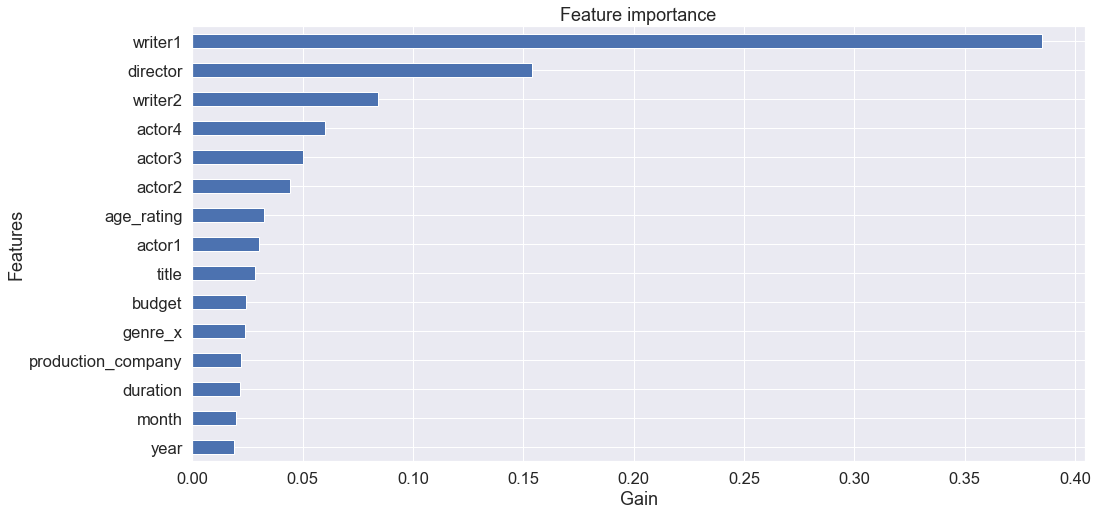

In [456]:
importances = pd.DataFrame(clf.feature_importances_, index=df_x.columns, columns=['importance']).sort_values(by='importance')
importances.plot.barh(figsize=(16,8), legend=None, title='Feature importance', y='importance')
plt.xlabel("Gain")
plt.ylabel("Features")


In [340]:
df_x.head()

,year,month,genre_x,duration,director,production_company,budget,age_rating,writer1,writer2,actor1,actor2,actor3,actor4
0,1963,7,0,192,80.500000,0,44000000,1,80.5,54.0,68.250000,61.666667,61.000000,79.80
1,1950,4,1,74,81.000000,1,2900000,1,79.0,83.0,91.000000,79.500000,84.714286,91.00
2,1950,4,1,74,81.000000,1,2900000,2,79.0,83.0,91.000000,79.500000,84.714286,91.00
3,2015,3,2,105,77.277778,2,95000000,1,71.2,79.0,69.463415,67.000000,90.333333,64.44
4,2015,3,2,105,77.277778,2,95000000,2,71.2,79.0,69.463415,67.000000,90.333333,64.44


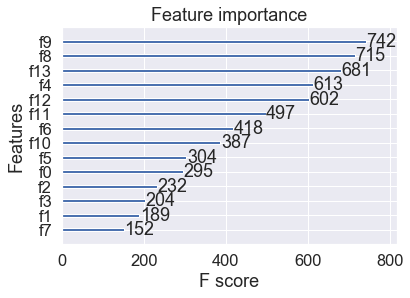

In [324]:
xgb.plot_importance(clf)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [496]:
train = np.array(df_x)
target = np.array(target_r_f)#change here
train = train.astype(float) 
#test = test.astype(float)

X_fit, X_eval, y_fit, y_eval= train_test_split(train, target, test_size=0.2, random_state=1)
#xgtrain = xgb.DMatrix(X_fit, label=y_fit, feature_names=feature_names)

xgdmat = xgb.DMatrix(X_fit, y_fit) 

our_params = {'eta': 0.1, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic', 'max_depth':5, 'min_child_weight':4} 
# Grid Search CV optimized settings

cv_xgb = xgb.cv(params = our_params, dtrain = xgdmat, num_boost_round = 3000, nfold = 5,
                metrics = ['error'], # Make sure you enter metrics inside a list or you may encounter issues!
                early_stopping_rounds = 100)

XGBoostError: [03:56:53] src/objective/regression_obj.cu:101: label must be in [0,1] for logistic regression

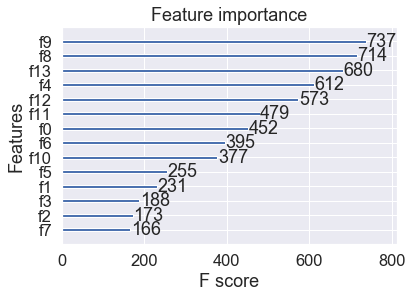

# Linear Regression Model NOT DONE


(6018, 15)
(6018,)
(1204, 15)
(1204,)
(4814, 15)
(4814,)
Mean Absolute Error: 62598053.92776039
Mean Squared Error: 1.2837593325780982e+16
Root Mean Squared Error: 113303103.77823275


ValueError: x and y must be the same size

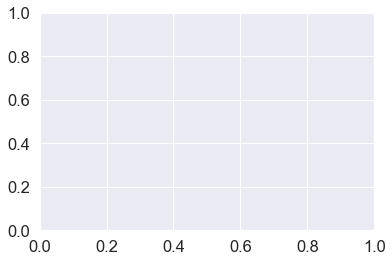

In [514]:
# train = np.array(df_x)
# target = np.array(target_r_f)#change here
# train = train.astype(float)
df_x = np.array(df_x)
df_x = df_x.astype(float)

print(df_x.shape)
print(target_ww_gi.shape)


X_fit, X_eval, y_fit, y_eval= train_test_split(df_x, target_ww_gi, test_size=0.2, random_state=1)
regressor = LinearRegression()  
regressor.fit(X_fit, y_fit)
y_pred = regressor.predict(X_fit)
print(X_eval.shape)
print(y_eval.shape)
print(X_fit.shape)
print(y_fit.shape)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_fit, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_fit, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_fit, y_pred)))
plt.scatter(X_fit, y_fit,  color='gray')
plt.plot(X_fit, y_pred, color='red', linewidth=2)
plt.show()

# SVM Plot Trial _I have not idea lol

# XgB_Regressor

In [240]:
train = np.array(df_x)
target = np.array(target_us_gi)#change here
train = train.astype(float) 
#test = test.astype(float)

X_fit, X_eval, y_fit, y_eval= train_test_split(train, target, test_size=0.2, random_state=1)
#xgtrain = xgb.DMatrix(X_fit, y_fit)
#xgtest = xgb.DMatrix(test)

xgb_reg = XGBRegressor(missing=np.nan, 
                        max_depth=5,#was 7 
                        n_estimators=2000, 
                        learning_rate=0.02,#was 0.01 
                      #  max_delta_step=4.0,
                        min_child_weight=4,
                        subsample=0.74, 
                        colsample_bytree=0.75, 
                        seed=2100)

#Change these functions below
xgb_reg.fit(X_fit,y_fit)
preds = xgb_reg.predict(X_eval)

rmse = np.sqrt(mean_squared_error(y_eval, preds))
print("RMSE: %f" % (rmse))

# evaluate predictions

print('\nModel parameters...')
print(clf.get_params())


[20:21:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 41325702.878555

Model parameters...
{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 0.75, 'gamma': 0, 'learning_rate': 0.01, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 3, 'missing': None, 'n_estimators': 2000, 'n_jobs': 1, 'nthread': None, 'objective': 'binary:logistic', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': 2100, 'silent': None, 'subsample': 0.74, 'verbosity': 1}


In [484]:
export_csv_x = df_x.to_csv (r'C:\Users\david\Business-Data-Science\x.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path
export_csv_y = df_y.to_csv (r'C:\Users\david\Business-Data-Science\y.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path



### Tuning XgBoost Classifier

In [234]:
param_test2 = {
 'max_depth':[0,1,2,3,4,5,6,7,8,9,10],
 'min_child_weight':[0,1,2,3,4,5,6,7,8,9,10],
 'learning_rate':[.01,.02,.03,.04,.05]
}

gsearch2 = GridSearchCV(estimator = xgb.XGBClassifier(missing=np.nan, max_depth=9, 
                        n_estimators=2000, learning_rate=0.03, 
                        subsample=.74, colsample_bytree=0.75, seed=2100,objective= 'binary:logistic'), 
param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(X_fit, y_fit, early_stopping_rounds=100,  eval_metric="accuracy", eval_set=[(X_eval, y_eval)])
gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_

[0]	validation_0-logloss:0.688112
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.683499
[2]	validation_0-logloss:0.678623
[3]	validation_0-logloss:0.673782
[4]	validation_0-logloss:0.669012
[5]	validation_0-logloss:0.664412
[6]	validation_0-logloss:0.659854
[7]	validation_0-logloss:0.655337
[8]	validation_0-logloss:0.650897
[9]	validation_0-logloss:0.647053
[10]	validation_0-logloss:0.642787
[11]	validation_0-logloss:0.638565
[12]	validation_0-logloss:0.634346
[13]	validation_0-logloss:0.630392
[14]	validation_0-logloss:0.62682
[15]	validation_0-logloss:0.622924
[16]	validation_0-logloss:0.61973
[17]	validation_0-logloss:0.615888
[18]	validation_0-logloss:0.612805
[19]	validation_0-logloss:0.60918
[20]	validation_0-logloss:0.60577
[21]	validation_0-logloss:0.602466
[22]	validation_0-logloss:0.598906
[23]	validation_0-logloss:0.595371
[24]	validation_0-logloss:0.592205
[25]	validation_0-logloss:0.589443
[26]	validation_0-logloss:0.586885


[230]	validation_0-logloss:0.357455
[231]	validation_0-logloss:0.357156
[232]	validation_0-logloss:0.35684
[233]	validation_0-logloss:0.356533
[234]	validation_0-logloss:0.35626
[235]	validation_0-logloss:0.356
[236]	validation_0-logloss:0.355738
[237]	validation_0-logloss:0.355464
[238]	validation_0-logloss:0.355183
[239]	validation_0-logloss:0.354928
[240]	validation_0-logloss:0.354642
[241]	validation_0-logloss:0.354383
[242]	validation_0-logloss:0.354188
[243]	validation_0-logloss:0.353887
[244]	validation_0-logloss:0.353643
[245]	validation_0-logloss:0.353388
[246]	validation_0-logloss:0.353148
[247]	validation_0-logloss:0.352896
[248]	validation_0-logloss:0.352655
[249]	validation_0-logloss:0.352407
[250]	validation_0-logloss:0.352201
[251]	validation_0-logloss:0.351946
[252]	validation_0-logloss:0.351742
[253]	validation_0-logloss:0.351492
[254]	validation_0-logloss:0.35126
[255]	validation_0-logloss:0.351022
[256]	validation_0-logloss:0.350794
[257]	validation_0-logloss:0.35052

[459]	validation_0-logloss:0.328148
[460]	validation_0-logloss:0.328089
[461]	validation_0-logloss:0.328026
[462]	validation_0-logloss:0.327996
[463]	validation_0-logloss:0.327949
[464]	validation_0-logloss:0.327918
[465]	validation_0-logloss:0.327883
[466]	validation_0-logloss:0.32784
[467]	validation_0-logloss:0.327783
[468]	validation_0-logloss:0.327704
[469]	validation_0-logloss:0.327648
[470]	validation_0-logloss:0.32761
[471]	validation_0-logloss:0.327562
[472]	validation_0-logloss:0.32753
[473]	validation_0-logloss:0.327505
[474]	validation_0-logloss:0.327475
[475]	validation_0-logloss:0.327451
[476]	validation_0-logloss:0.327448
[477]	validation_0-logloss:0.327388
[478]	validation_0-logloss:0.327368
[479]	validation_0-logloss:0.327345
[480]	validation_0-logloss:0.327315
[481]	validation_0-logloss:0.327267
[482]	validation_0-logloss:0.327259
[483]	validation_0-logloss:0.327214
[484]	validation_0-logloss:0.32722
[485]	validation_0-logloss:0.327198
[486]	validation_0-logloss:0.327

[688]	validation_0-logloss:0.32258
[689]	validation_0-logloss:0.322572
[690]	validation_0-logloss:0.322518
[691]	validation_0-logloss:0.32252
[692]	validation_0-logloss:0.322495
[693]	validation_0-logloss:0.322488
[694]	validation_0-logloss:0.322451
[695]	validation_0-logloss:0.322445
[696]	validation_0-logloss:0.322323
[697]	validation_0-logloss:0.32231
[698]	validation_0-logloss:0.322266
[699]	validation_0-logloss:0.322247
[700]	validation_0-logloss:0.322196
[701]	validation_0-logloss:0.322172
[702]	validation_0-logloss:0.322164
[703]	validation_0-logloss:0.322165
[704]	validation_0-logloss:0.32212
[705]	validation_0-logloss:0.322109
[706]	validation_0-logloss:0.322057
[707]	validation_0-logloss:0.322038
[708]	validation_0-logloss:0.322041
[709]	validation_0-logloss:0.321982
[710]	validation_0-logloss:0.321971
[711]	validation_0-logloss:0.321957
[712]	validation_0-logloss:0.32195
[713]	validation_0-logloss:0.321952
[714]	validation_0-logloss:0.321961
[715]	validation_0-logloss:0.3219

[917]	validation_0-logloss:0.320919
[918]	validation_0-logloss:0.320914
[919]	validation_0-logloss:0.320923
[920]	validation_0-logloss:0.320916
[921]	validation_0-logloss:0.320919
[922]	validation_0-logloss:0.320924
[923]	validation_0-logloss:0.320938
[924]	validation_0-logloss:0.320936
[925]	validation_0-logloss:0.32091
[926]	validation_0-logloss:0.320906
[927]	validation_0-logloss:0.3209
[928]	validation_0-logloss:0.320912
[929]	validation_0-logloss:0.320943
[930]	validation_0-logloss:0.32095
[931]	validation_0-logloss:0.320954
[932]	validation_0-logloss:0.320935
[933]	validation_0-logloss:0.320881
[934]	validation_0-logloss:0.320922
[935]	validation_0-logloss:0.320935
[936]	validation_0-logloss:0.320882
[937]	validation_0-logloss:0.320877
[938]	validation_0-logloss:0.320883
[939]	validation_0-logloss:0.320867
[940]	validation_0-logloss:0.32086
[941]	validation_0-logloss:0.320869
[942]	validation_0-logloss:0.320855
[943]	validation_0-logloss:0.320781
[944]	validation_0-logloss:0.3208

[1142]	validation_0-logloss:0.319767
[1143]	validation_0-logloss:0.319777
[1144]	validation_0-logloss:0.319747
[1145]	validation_0-logloss:0.319761
[1146]	validation_0-logloss:0.319757
[1147]	validation_0-logloss:0.319726
[1148]	validation_0-logloss:0.31972
[1149]	validation_0-logloss:0.319741
[1150]	validation_0-logloss:0.319735
[1151]	validation_0-logloss:0.319723
[1152]	validation_0-logloss:0.319756
[1153]	validation_0-logloss:0.319717
[1154]	validation_0-logloss:0.319693
[1155]	validation_0-logloss:0.319687
[1156]	validation_0-logloss:0.319691
[1157]	validation_0-logloss:0.319736
[1158]	validation_0-logloss:0.319727
[1159]	validation_0-logloss:0.31974
[1160]	validation_0-logloss:0.31978
[1161]	validation_0-logloss:0.31977
[1162]	validation_0-logloss:0.319787
[1163]	validation_0-logloss:0.319806
[1164]	validation_0-logloss:0.319829
[1165]	validation_0-logloss:0.319849
[1166]	validation_0-logloss:0.319834
[1167]	validation_0-logloss:0.319872
[1168]	validation_0-logloss:0.31988
[1169]

C:\Users\david\Anaconda3\Setup_DK\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\david\Anaconda3\Setup_DK\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\david\Anaconda3\Setup_DK\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\david\Anaconda3\Set

({'mean_fit_time': array([0.77839713, 0.76838684, 0.79355235, 0.80852108, 0.88026223,
         0.8104733 , 0.81066637, 0.79274511, 0.8046854 , 0.8214108 ,
         0.79033599, 3.5974843 , 3.62802105, 3.8196259 , 3.66557813,
         3.49885116, 3.57439718, 3.38461204, 3.59995017, 3.31148148,
         3.53124185, 3.45223041, 3.56104159, 3.91598358, 3.45595183,
         3.58019023, 3.41836033, 3.27293229, 3.11497946, 3.49066634,
         3.40519252, 3.21125603, 3.00271163, 3.75171614, 3.9679306 ,
         3.76035504, 3.78568473, 3.86868944, 3.51414227, 3.60061436,
         3.866398  , 3.99695745, 3.54211016, 3.70747633, 3.81861749,
         4.11658597, 3.91414738, 4.01970735, 4.53635335, 3.58582602,
         4.12719846, 3.98117075, 4.13241873, 3.93048096, 3.61228967,
         4.24784708, 4.1337111 , 4.12690105, 3.99824209, 4.37587938,
         3.39572654, 3.39867802, 3.51655054, 3.31847129, 3.32453213,
         3.11571603, 3.77589364, 4.28834367, 5.54032388, 5.97575779,
         4.408553

### SVM

In [524]:
X_eval.shape
#X_fit.shape

(1204, 15)

In [481]:
df_x.fillna(0, inplace=True)

In [ ]:
#X_fit, X_eval, y_fit, y_eval= train_test_split(train, target, test_size=0.2, random_state=1)
sc = StandardScaler()
sc.fit(X_fit)
x_train_standardized, x_test_standardized = sc.transform(X_fit), sc.transform(X_eval)

In [544]:
#X_fit.columns.toDataframe()
x_fit = pd.DataFrame(X_fit)
x_fit.columns = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14']
x_fit = x_fit.drop(['0','1','2','3','4','6','7','8','10','11','12','13','14'],axis=1)
#5 and 9 
x_fit
#X_eval
x_eval = pd.DataFrame(X_eval)
x_eval.columns = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14']
x_eval = x_eval.drop(['0','1','2','3','4','6','7','8','10','11','12','13','14'],axis=1)
x_eval
X_fit = x_fit
X_eval = x_eval
sc = StandardScaler()
sc.fit(X_fit)
x_train_standardized, x_test_standardized = sc.transform(X_fit), sc.transform(X_eval)

In [ ]:
from mlxtend.plotting import plot_decision_regions

#for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
#print('For kernel parameter value:', kernel)
svm = SVC(kernel=kernel, C=2)
svm.fit(x_train_standardized, y_fit)
plot_decision_regions(x_train_standardized, y_fit,clf=svm, legend=2)
plt.xlabel('test')
plt.ylabel('idc')
plt.title('SVM')
plt.show()
#y_pred = svm.predict(x_test_standardized)
    
    
#svc = svm.SVC(kernel='linear', C=1).fit(x_train_standardized, y_fit)
#     print
#     print('Misclassified samples: %d' % (y_eval != y_pred).sum())
#     print('Accuracy: %.2f' % accuracy_score(y_eval, y_pred))
#     print('_____')

In [ ]:
from mlxtend.plotting import plot_decision_regions

#for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
#print('For kernel parameter value:', kernel)
svm = SVC(kernel=kernel, C=2)
svm.fit(x_train_standardized, y_fit)
plot_decision_regions(x_train_standardized, y_fit,clf=svm, legend=2,filler_feature_values=14)
plt.xlabel('test')
plt.ylabel('idc')
plt.title('SVM')
plt.show()
#y_pred = svm.predict(x_test_standardized)
    
    
#svc = svm.SVC(kernel='linear', C=1).fit(x_train_standardized, y_fit)
#     print
#     print('Misclassified samples: %d' % (y_eval != y_pred).sum())
#     print('Accuracy: %.2f' % accuracy_score(y_eval, y_pred))
#     print('_____')

Code for SVM visuals

-6.879203415875468 9.748106591851876 -0.014170400266629277 -1 2
[] []


ValueError: Found array with 0 sample(s) (shape=(0, 2)) while a minimum of 1 is required.

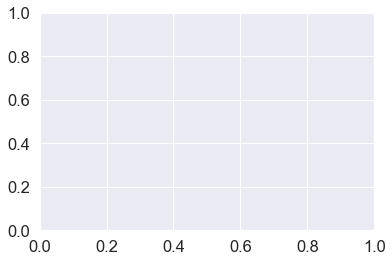

In [479]:
# x_min, x_max = X_fit.min() - 1, X_fit.max() + 1

x_min, x_max = x_train_standardized.min() - 1, x_train_standardized.max() + 1
y_min, y_max = y_fit.min() - 1, y_fit.max() + 1
h = (x_max / x_min)/100
print(x_min,x_max, h, y_min,y_max)
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))

plt.subplot(1, 1, 1)
print(xx, yy)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
#Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

plt.scatter(X_fit, y_fit, c=y_fit, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()

#svc = svm.SVC(kernel='rbf', C=1,gamma=0).fit(x_train_standardized, y_fit)

In [ ]:
setosa_x = [d[1] for i, d in enumerate(x_vals) if y_vals[i] == 1]
setosa_y = [d[0] for i, d in enumerate(x_vals) if y_vals[i] == 1]
not_setosa_x = [d[1] for i, d in enumerate(x_vals) if y_vals[i] == -1]
not_setosa_y = [d[0] for i, d in enumerate(x_vals) if y_vals[i] == -1]

In [ ]:
# Plot data and line

plt.plot(fresh_x, fresh_y, 'o', label='Fresh')
plt.plot(rotten_x, rotten_y, 'x', label='Rotten')
plt.plot(x1_vals, best_fit, 'r-', label='Linear Separator', linewidth=3)
plt.ylim([0, 10])
plt.legend(loc='lower right')
plt.title('SVM Review Classifier')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [493]:
print(X_fit.shape)
X_fit = X_fit.values
X_fit=np.reshape(X_fit(-1,1))
print(X_fit.shape)

(4814, 15)


TypeError: 'numpy.ndarray' object is not callable

In [492]:
X_fit

,title,year,month,genre_x,duration,director,production_company,budget,age_rating,writer1,writer2,actor1,actor2,actor3,actor4
4282,3678,2009,4,11,98,19.000000,1231,3000000,3,39.750000,39.750000,37.800000,34.166667,19.000000,54.000000
2032,1568,1994,6,40,117,56.500000,107,4400000,4,69.111111,0.000000,62.222222,50.000000,67.111111,51.230769
5790,5143,2015,7,78,88,96.000000,1141,100000,4,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
1715,1279,1991,3,46,105,54.733333,530,29000000,4,65.375000,46.000000,45.636364,41.066667,32.500000,52.500000
2371,1884,1998,1,40,108,71.000000,0,30000000,4,60.000000,60.000000,76.000000,45.000000,55.894737,71.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906,590,1981,7,57,125,43.750000,0,5500000,2,81.000000,0.000000,52.142857,74.250000,79.666667,50.000000
5206,4571,2014,7,197,104,55.100000,989,30000000,3,16.000000,44.666667,43.000000,14.333333,33.000000,54.520000
3992,3408,2006,8,101,112,85.000000,1142,8000000,2,85.000000,0.000000,34.142857,55.804878,58.500000,49.454545
235,127,1982,5,7,129,71.352941,0,16000000,4,90.000000,65.785714,67.642857,52.066667,44.571429,85.600000


In [489]:

svm = SVC(kernel='linear', C=1000)
clf.fit(X_fit, y_fit)

plt.scatter(X_fit[:, 0], X_fit[:, 1], c=y_fit, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

TypeError: '(slice(None, None, None), 0)' is an invalid key

In [ ]:
# Sci-Kit Learn Perceptron Model
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

## your code here
PPN = Perceptron(max_iter=10, eta0=0.2, random_state=0)
PPN.fit(x_train_standardized, y_train)

y_pred = PPN.predict(x_test_standardized)

print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

# Plotting decision boundaries
x_combined_std = np.vstack((x_train_standardized, x_test_standardized))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(x=x_combined_std, y=y_combined,
                      classifier=PPN, test_idx=range(len(y_train),len(y_train) + len(y_test)))
plt.title('Sci-Kit Learn Perceptron')
plt.xlabel('Sepal Width [Standardized]')
plt.ylabel('Petal Length [Standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [460]:
X_iso

array([[   591602.72266902,   -179574.62694142],
       [   599188.69454519,   -188579.75611471],
       [   617701.67612247,   -209548.96156112],
       ...,
       [   595844.42199014,   -183740.30614153],
       [   613928.05402988,   -204372.26349321],
       [-31490549.98422889,   -650527.60317043]])

In [437]:
#df_x.isna().sum()
# df_x = df_x[df_x['writer2'].notnull()]
# df_x = df_x[df_x['actor2'].notnull()]
# df_x = df_x[df_x['actor3'].notnull()]
# df_x = df_x[df_x['actor4'].notnull()]


df_x['writer2'].fillna(0, )

0       54.000000
1       83.000000
2       83.000000
3       79.000000
4       79.000000
          ...    
6028    41.000000
6029    47.250000
6030    48.333333
6031     0.000000
6032    21.500000
Name: writer2, Length: 6018, dtype: float64

In [439]:
# df_x.isna().sum()
df_x['writer2'].apply(lambda x:print(x) if x else x)
# df_x.isna().sum()

54.0
83.0
83.0
79.0
79.0
52.2
52.2
52.2
52.2
85.0
85.0
56.333333333333336
65.75
95.0
79.33333333333333
79.33333333333333
79.33333333333333
79.33333333333333
79.33333333333333
77.6
77.6
77.6
77.6
77.6
nan
nan
nan
nan
nan
nan
35.2
46.25
46.25
46.25
46.25
54.857142857142854
54.857142857142854
54.857142857142854
54.857142857142854
62.75
62.75
75.05263157894737
nan
25.0
76.25
53.05263157894737
53.05263157894737
53.05263157894737
53.05263157894737
53.0
53.0
53.0
53.0
59.5
87.33333333333333
87.33333333333333
87.33333333333333
88.5
88.5
nan
nan
64.0
64.0
78.0
78.0
nan
65.4
65.4
49.642857142857146
40.0
nan
35.5
35.5
70.4
98.0
33.666666666666664
85.0
47.0
47.0
93.0
93.0
nan
54.5
24.0
75.8
75.8
57.666666666666664
86.5
nan
50.666666666666664
39.0
36.5
nan
71.33333333333333
71.33333333333333
71.33333333333333
62.833333333333336
62.833333333333336
62.833333333333336
58.5
58.5
94.0
72.85714285714286
34.8
nan
62.25
58.0
58.0
56.4
56.4
56.4
56.4
62.36363636363637
62.36363636363637
62.36363636363637
62.

nan
81.04761904761905
49.714285714285715
52.142857142857146
40.0
nan
85.0
42.0
57.8
78.6
nan
nan
nan
63.0
63.0
nan
nan
75.0
74.25
41.25
9.0
20.0
nan
nan
43.0
20.0
74.0
nan
nan
34.8
60.833333333333336
38.42857142857143
21.0
26.0
nan
84.0
46.0
nan
45.0
nan
nan
nan
6.0
57.0
nan
31.0
77.0
nan
nan
nan
nan
95.0
48.0
48.0
39.5
39.5
70.33333333333333
68.0
31.833333333333332
64.33333333333333
64.33333333333333
37.75
nan
65.0
94.0
nan
31.0
63.0
57.666666666666664
nan
31.0
33.0
49.666666666666664
nan
42.375
62.666666666666664
nan
nan
nan
nan
41.5
nan
nan
nan
nan
85.5
nan
81.33333333333333
59.666666666666664
nan
32.0
78.5
78.5
54.25
54.25
80.0
54.0
77.0
nan
nan
41.333333333333336
nan
65.5
nan
23.0
88.75
51.75
79.0
79.0
17.0
nan
14.0
nan
70.0
61.81818181818182
45.0
48.5
nan
48.0
84.0
41.142857142857146
30.5
51.1764705882353
51.1764705882353
53.75
53.75
65.78571428571429
nan
39.333333333333336
75.5
75.5
nan
50.0
63.333333333333336
nan
nan
nan
nan
nan
78.0
35.0
78.0
72.85714285714286
nan
92.0
nan
76.

nan
65.78571428571429
nan
33.6
54.0
35.666666666666664
8.0
49.0
75.6
nan
nan
51.0
nan
nan
nan
79.0
28.666666666666668
24.666666666666668
30.666666666666668
74.5
74.5
nan
nan
nan
62.0
nan
56.81818181818182
58.5
nan
nan
42.0
42.0
nan
57.3
26.0
nan
52.5
nan
39.0
11.0
3.0
nan
14.0
24.0
56.0
62.5
18.5
nan
nan
nan
35.2
nan
54.857142857142854
78.0
28.0
93.5
nan
17.0
55.25
61.2
14.5
9.0
48.333333333333336
10.0
nan
nan
84.5
nan
nan
nan
38.5
nan
83.0
56.0
56.75
62.0
13.0
81.0
36.0
nan
28.5
nan
57.6
nan
nan
nan
79.0
79.0
32.0
11.166666666666666
23.0
28.0
nan
60.375
nan
45.0
85.5
nan
35.0
34.25
45.0
63.8
93.0
nan
24.0
37.0
6.0
82.0
30.0
48.0
nan
37.75
75.5
38.5
38.5
63.75
42.0
nan
nan
35.2
51.25
7.0
73.0
87.0
65.0
58.357142857142854
nan
nan
47.5
47.5
31.0
42.0
nan
48.0
nan
nan
nan
30.0
nan
43.0
41.5
nan
80.0
55.5
18.6
72.28571428571429
nan
8.0
31.0
nan
nan
80.0
57.0
25.0
nan
47.5
56.333333333333336
23.0
62.0
nan
37.0
nan
30.5
30.5
nan
61.0
13.0
nan
nan
77.0
nan
83.0
nan
nan
38.6
81.5
8.0
67.0
43.0

nan
50.06666666666667
79.5
nan
nan
54.0
50.5
61.0
61.0
nan
32.0
nan
58.5
57.0
47.833333333333336
26.666666666666668
61.0
nan
5.0
45.0
51.42857142857143
68.5
68.5
42.0
30.666666666666668
nan
48.0
85.0
75.0
63.0
62.36363636363637
57.0
36.0
72.0
47.4
42.0
nan
52.0
22.0
56.0
43.0
nan
71.0
26.0
nan
11.166666666666666
20.0
nan
54.0
50.77777777777778
18.0
56.666666666666664
nan
64.5
nan
50.5
41.166666666666664
84.0
97.0
9.0
nan
45.42857142857143
nan
51.1764705882353
50.5
59.333333333333336
nan
94.0
31.0
45.0
59.5
nan
nan
nan
14.0
32.0
58.0
18.0
48.333333333333336
5.5
33.6
44.5
61.0
70.75
nan
7.0
61.0
18.0
nan
79.0
35.5
66.0
42.0
nan
76.0909090909091
92.0
43.5625
75.0
67.0
nan
39.75
39.75
nan
39.0
43.285714285714285
20.5
65.0
nan
54.333333333333336
61.5
26.0
91.0
78.66666666666667
80.0
76.0
79.5
62.0
57.666666666666664
51.0
nan
nan
35.0
34.333333333333336
56.0
47.75
74.0
18.0
57.0
48.0
nan
nan
78.0
37.9
nan
75.0
nan
63.0
93.0
76.0909090909091
59.0
nan
nan
80.8
44.0
39.42857142857143
86.0
97.0


0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
6028   NaN
6029   NaN
6030   NaN
6031   NaN
6032   NaN
Name: writer2, Length: 6018, dtype: float64

In [480]:
train = np.array(df_x)
target = np.array(target_us_gi)#change here
train = train.astype(float) 
#test = test.astype(float)

df_x.fillna(0, inplace=True)

X = df_x
y= target_r_f


X_fit, X_eval, y_fit, y_eval= train_test_split(X,y,test_size=0.2, random_state=1)
for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    print('For kernel parameter value:', kernel)
    svm = SVC(kernel=kernel, C=10)
    svm.fit(x_train_standardized, y_fit)
    y_pred = svm.predict(x_test_standardized)
    print('Misclassified samples: %d' % (y_eval != y_fit).sum())
    print('Accuracy: %.2f' % accuracy_score(y_eval, y_fit))
    print('_____')

For kernel parameter value: linear


C:\Users\david\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:18: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


AttributeError: 'bool' object has no attribute 'sum'

### Logistic Regression 

# For Linear Data